In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from tensorflow import keras
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
reviews = pd.read_csv('olist_reviews.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')
sellers = pd.read_csv('olist_sellers.csv')

In [2]:
# Objective: Customer segemention (Behavioural segmentation), Customer Purchase Behaviour Analysis

In [3]:
df_cus_seg= pd.merge(customers, orders, on="customer_id", how='inner')
df_cus_seg= df_cus_seg.merge(reviews, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(order_items, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(products, on="product_id", how='inner')
df_cus_seg= df_cus_seg.merge(payments, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(sellers, on='seller_id', how='inner')
df_cus_seg.shape

(113216, 33)

In [4]:
df_cus_seg.duplicated().sum()

644

In [5]:
df_cus_seg.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113211    False
113212    False
113213    False
113214    False
113215    False
Length: 113216, dtype: bool

In [6]:
df_cus_seg.describe()

customer_zip_code_prefix   review_score  order_item_id          price  \
count             113216.000000  113216.000000  113216.000000  113216.000000   
mean               35084.548703       4.082365       1.195052     119.869740   
std                29867.207356       1.346005       0.687474     181.127416   
min                 1003.000000       1.000000       1.000000       0.850000   
25%                11310.000000       4.000000       1.000000      39.900000   
50%                24315.000000       5.000000       1.000000      74.900000   
75%                58844.250000       5.000000       1.000000     132.985000   
max                99980.000000       5.000000      21.000000    6735.000000   

       freight_value  product_weight_g  product_length_cm  product_height_cm  \
count  113216.000000     113216.000000      113216.000000      113216.000000   
mean       20.002353       2106.346400          30.276922          16.598652   
std        15.710909       3765.034692          16.144080          13.436740   
min         0.000000          0.000000           7.000000           2.000000   
25%        13.080000        300.000000          18.000000           8.000000   
50%        16.320000        700.000000          25.000000          13.000000   
75%        21.190000       1800.000000          38.000000          20.000000   
max       409.680000      40425.000000         105.000000         105.000000   

       product_width_cm  payment_installments  payment_value  \
count     113216.000000         113216.000000  113216.000000   
mean          23.099412              2.943515     171.577925   
std           11.734956              2.779137     264.218677   
min            6.000000              0.000000       0.000000   
25%           15.000000              1.000000      60.850000   
50%           20.000000              2.000000     107.970000   
75%           30.000000              4.000000     189.160000   
max          118.000000             24.000000   13664.080000   

       seller_zip_code_prefix  
count           113216.000000  
mean             24522.449769  
std              27646.979640  
min               1001.000000  
25%               6429.000000  
50%              13660.000000  
75%              28495.000000  
max              99730.000000

In [7]:
df_cus_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 113215
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113216 non-null  object 
 1   customer_unique_id             113216 non-null  object 
 2   customer_zip_code_prefix       113216 non-null  int64  
 3   customer_city                  113216 non-null  object 
 4   customer_state                 113216 non-null  object 
 5   order_id                       113216 non-null  object 
 6   order_status                   113216 non-null  object 
 7   order_purchase_timestamp       113216 non-null  object 
 8   order_approved_at              113216 non-null  object 
 9   order_delivered_carrier_date   113216 non-null  object 
 10  order_delivered_customer_date  113216 non-null  object 
 11  order_estimated_delivery_date  113216 non-null  object 
 12  review_id                     

In [8]:
df_cus_seg.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [9]:
df_cus_seg.isna().sum()[:20]

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
dtype: int64

In [10]:
df_cus_seg.to_csv('olist_merged_dataset.csv', index=False)
# export the merged dataset to used in other objectives

In [11]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df_cus_seg['product_category'] = df_cus_seg.product_category_name.apply(classify_cat)

In [12]:
df_cus_seg.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

In [13]:
# Check the data types of the columns
print(df_cus_seg[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'order_delivered_carrier_date']].dtypes)

# Check for non-null values in the problematic columns
print(df_cus_seg[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'order_delivered_carrier_date']].notnull().all())

order_purchase_timestamp         object
order_delivered_customer_date    object
order_estimated_delivery_date    object
shipping_limit_date              object
order_delivered_carrier_date     object
dtype: object
order_purchase_timestamp         True
order_delivered_customer_date    True
order_estimated_delivery_date    True
shipping_limit_date              True
order_delivered_carrier_date     True
dtype: bool


In [14]:
# Convert Datetime features from Object to Datetime
df_cus_seg['order_purchase_timestamp'] = pd.to_datetime(df_cus_seg['order_purchase_timestamp'])
df_cus_seg['order_delivered_customer_date'] = pd.to_datetime(df_cus_seg['order_delivered_customer_date'])
df_cus_seg['order_estimated_delivery_date'] = pd.to_datetime(df_cus_seg['order_estimated_delivery_date'])
df_cus_seg['shipping_limit_date'] = pd.to_datetime(df_cus_seg['shipping_limit_date'])
df_cus_seg['order_delivered_carrier_date'] =pd.to_datetime(df_cus_seg['order_delivered_carrier_date'])

In [15]:
# Extract duration of estimated shipping from purchasing date until estimated delivery date
df_cus_seg['estimated_days'] = (df_cus_seg['order_estimated_delivery_date'] - df_cus_seg['order_purchase_timestamp']).dt.days

In [16]:
# Extract duration of shipping from purchasing date until delivered to customer date
df_cus_seg['arrival_days'] = (df_cus_seg['order_delivered_customer_date'] - df_cus_seg['order_purchase_timestamp']).dt.days

In [17]:
# Extract duration of shipping from purchasing carrier delivered date untill delivered to customer
df_cus_seg['shipping_days'] = (df_cus_seg['order_delivered_customer_date'] - df_cus_seg['order_delivered_carrier_date']).dt.days

In [18]:
# Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
df_cus_seg.drop((df_cus_seg[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_cus_seg.shipping_days < 0]).index, inplace= True)

In [19]:
# Shipping status from Seller to Carrier
# First get seller to carrier duration in days
df_cus_seg['seller_to_carrier_status'] = (df_cus_seg['shipping_limit_date'] - df_cus_seg['order_delivered_carrier_date']).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df_cus_seg['seller_to_carrier_status'] = df_cus_seg['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

In [20]:
# Shipping status from Carrier to Customer
# First get difference between estimated delivery date and actual delivery date in days
df_cus_seg['arrival_status'] = (df_cus_seg['order_estimated_delivery_date'] - df_cus_seg['order_delivered_customer_date']).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df_cus_seg['arrival_status'] = df_cus_seg['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

In [21]:
# check the colums of the dataframe
df_cus_seg.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category', 'estimated_days', 'arrival_days', 'shipping_days',
       'seller_to_carrier_status', 'arrival_status'],
      dtype='object')

In [22]:
# Show statistics of new Features

In [23]:
df_cus_seg[['estimated_days', 'arrival_days', 'shipping_days']].describe()

estimated_days   arrival_days  shipping_days
count   113158.000000  113158.000000  113158.000000
mean        23.468575      11.978835       8.720744
std          8.825972       9.362431       8.537467
min          2.000000       0.000000       0.000000
25%         18.000000       6.000000       4.000000
50%         23.000000      10.000000       7.000000
75%         28.000000      15.000000      11.000000
max        155.000000     208.000000     205.000000

In [24]:
#  Remove Outliers in both features ( More than 60 days )
outlier_indices = df_cus_seg[(df_cus_seg.estimated_days > 60) | (df_cus_seg.arrival_days > 60) | (df_cus_seg.shipping_days > 60)].index

df_cus_seg.drop(outlier_indices, inplace= True)
df_cus_seg.reset_index(inplace= True, drop= True)

In [25]:
# Rating estimated delivery time
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df_cus_seg['estimated_delivery_rate'] = df_cus_seg.estimated_days.apply(rates)

df_cus_seg['arrival_delivery_rate'] = df_cus_seg.arrival_days.apply(rates)

df_cus_seg['shipping_delivery_rate'] = df_cus_seg.shipping_days.apply(rates)

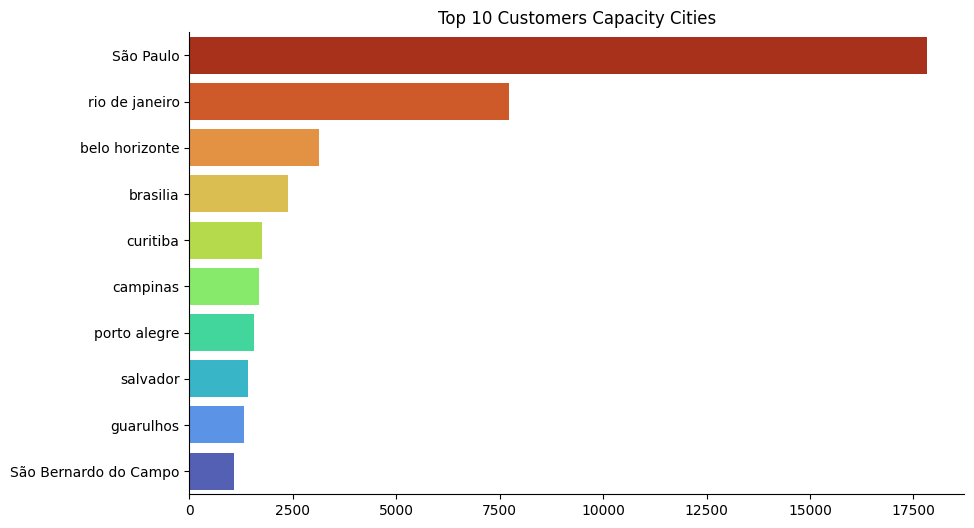

In [26]:
# EDA
# Top 10 Customers Capacity Cities

plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.customer_city.value_counts().values[:10], 
            y = df_cus_seg.customer_city.value_counts().index[:10], palette= 'turbo_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

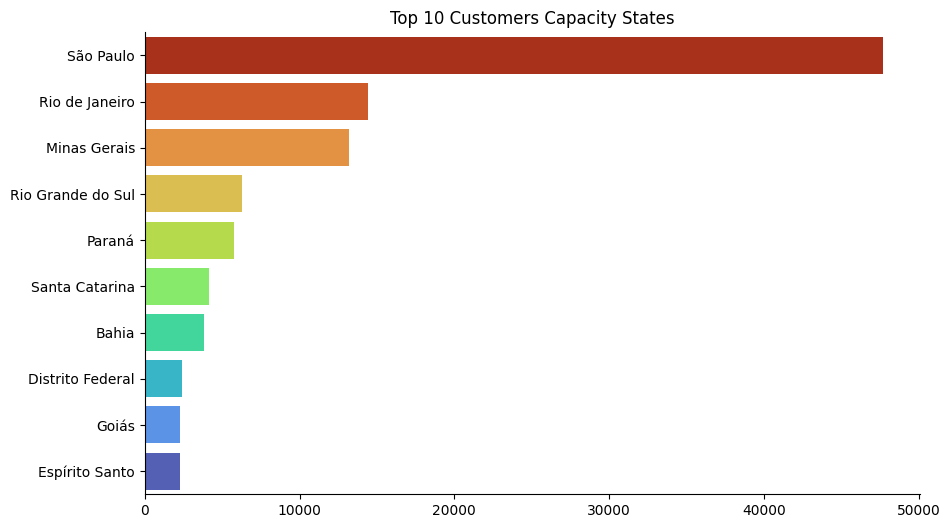

In [27]:
# Top 10 Customers Capacity States

plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.customer_state.value_counts().values[:10], 
            y = df_cus_seg.customer_state.value_counts().index[:10], palette= 'turbo_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

In [28]:
# Order Status
df_cus_seg.order_status.value_counts()

delivered    112583
canceled          7
Name: order_status, dtype: int64

In [29]:
# Due to the Extreme imbalance and lack of variance in the feature, we should drop it
df_cus_seg.drop('order_status', axis=1, inplace=True)

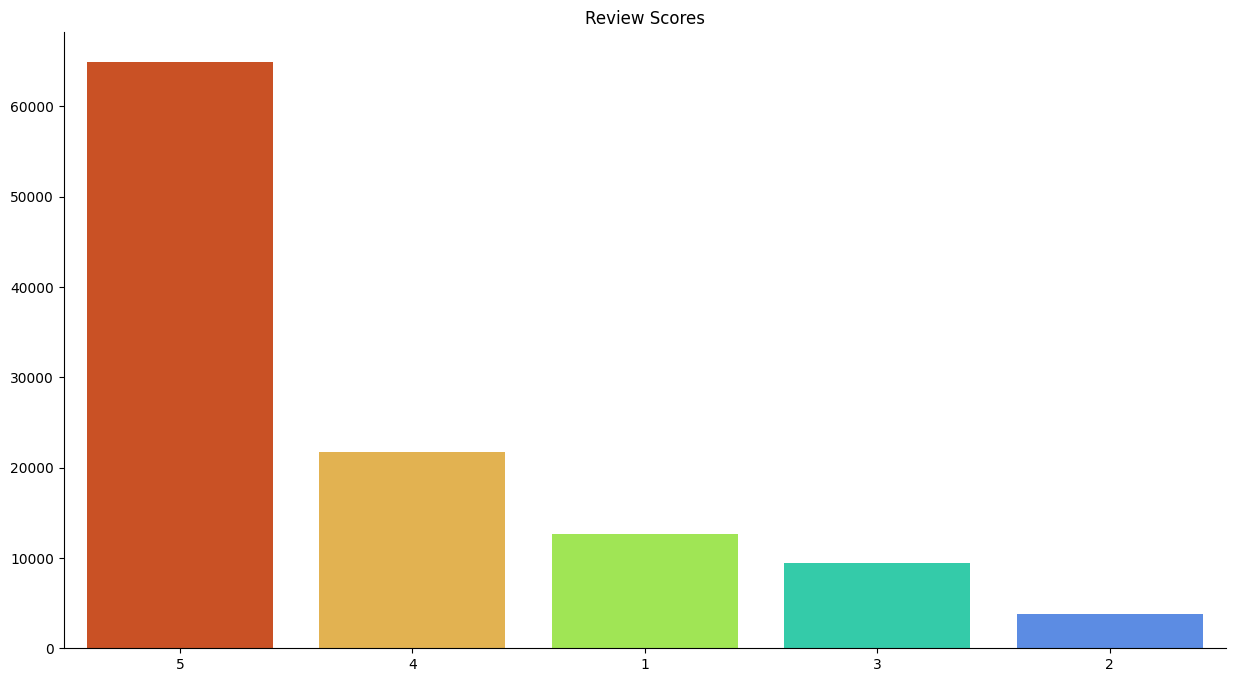

In [30]:
# Review Score
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in 
                      df_cus_seg.review_score.value_counts().index]
sns.barplot(x = review_score_index, 
            y= df_cus_seg.review_score.value_counts().values, 
            palette= 'turbo_r')
plt.title('Review Scores')
sns.despine()

In [31]:
# Price
plt.figure(figsize=[10, 6])
sns.distplot(x = df_cus_seg.price, color='#EE6B6E')
plt.title('Price Distribution')
sns.despine()

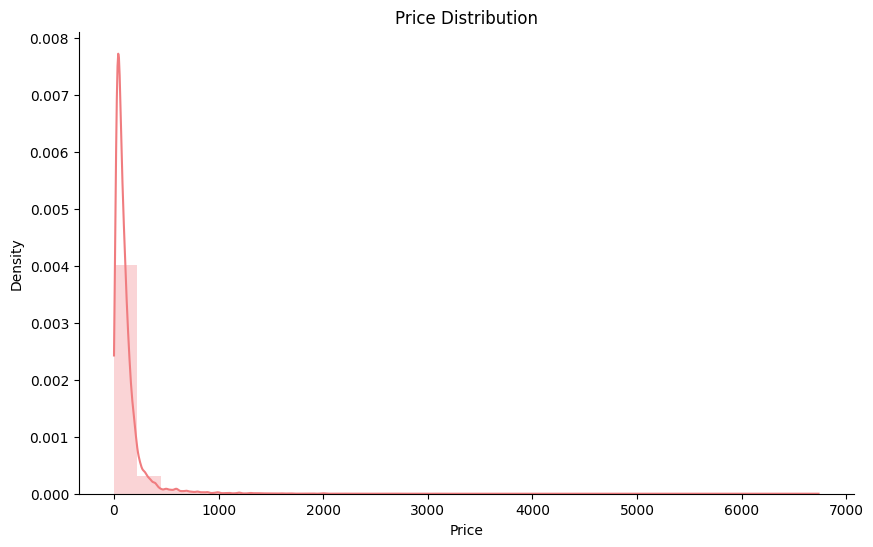

In [32]:
from scipy.stats import gaussian_kde

# Price
plt.figure(figsize=[10, 6])

# Histogram
plt.hist(df_cus_seg['price'], color='#F8C3C5', bins=30, density=True, alpha=0.7, label='Histogram')

# KDE plot
kde = gaussian_kde(df_cus_seg['price'].values.flatten())
x_vals = np.linspace(min(df_cus_seg['price']), max(df_cus_seg['price']), 1000)
plt.plot(x_vals, kde(x_vals), color='#F07C7F', label='KDE')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

sns.despine()
plt.show()

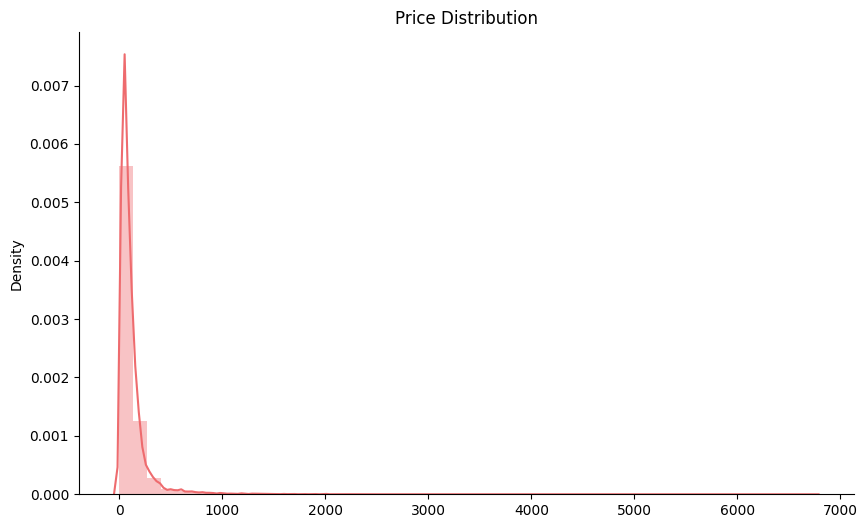

In [33]:
# Price
plt.figure(figsize=[10, 6])
sns.distplot(x = df_cus_seg.price, color='#EE6B6E')
plt.title('Price Distribution')
sns.despine()

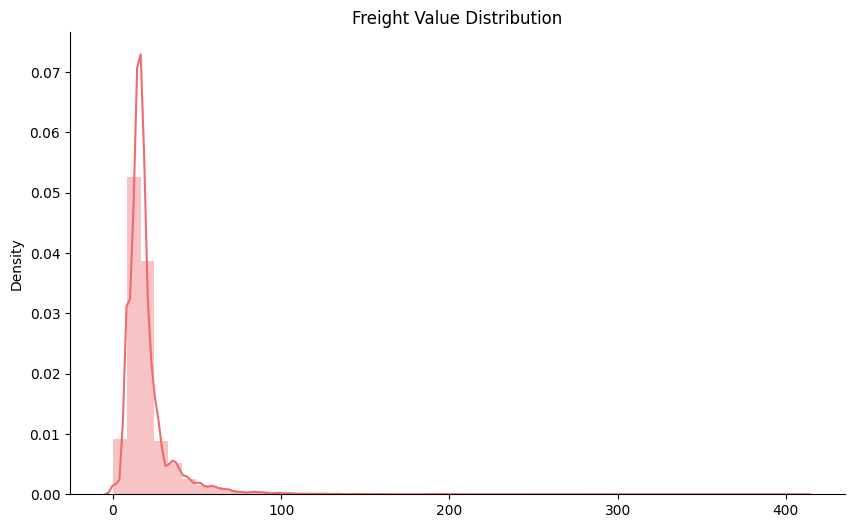

In [34]:
# Freight Value 
plt.figure(figsize=[10, 6])
sns.distplot(x = df_cus_seg.freight_value, color='#EE6B6E')
plt.title('Freight Value Distribution')
sns.despine()

In [35]:
# Number of orders per each Category
plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.product_category.value_counts().values, 
            y = df_cus_seg.product_category.value_counts().index, palette= 'turbo_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

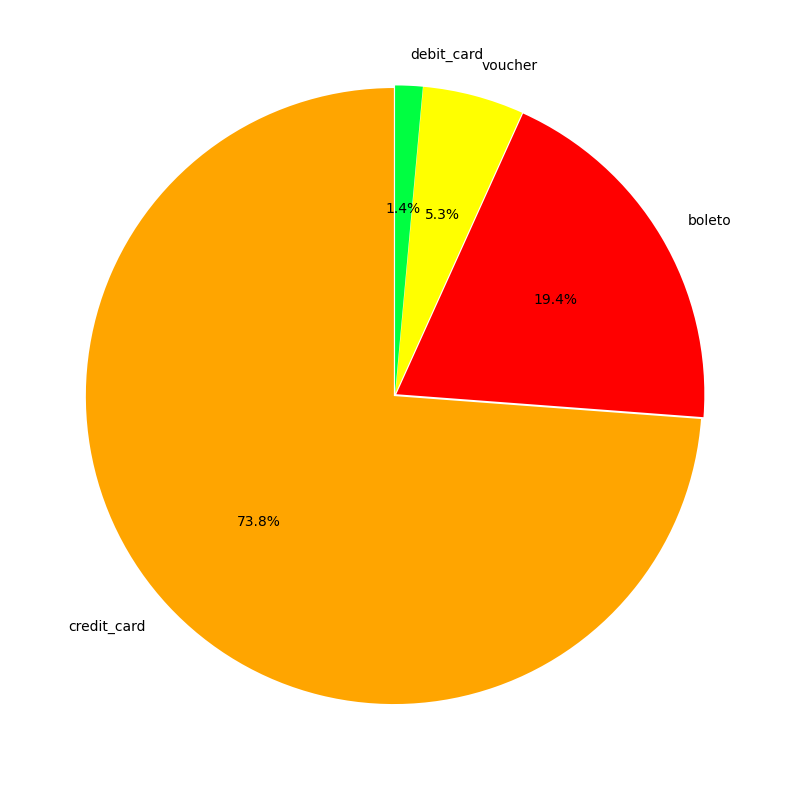

In [36]:
# payment type
plt.figure(figsize=[10, 10])
colors = ['#FFA500', '#FF0000', '#FFFF00', '#00FF41' ]
plt.pie(df_cus_seg.payment_type.value_counts().values, 
        explode=(0.005, 0.005, 0.005, 0.005), 
        labels= df_cus_seg.payment_type.value_counts().index, colors=colors,
        autopct='%1.1f%%',shadow=False, startangle=90, textprops={'color':"black"});

In [37]:
# Payment Installments
df_cus_seg.payment_installments.value_counts()

1     56147
2     13096
3     11261
4      7646
10     6577
5      5779
8      4845
6      4418
7      1723
9       685
12      157
15       85
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [38]:
installment0 = df_cus_seg[df_cus_seg.payment_installments == 0]
installment0

customer_id                customer_unique_id  \
55143  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
55144  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
89743  5e5794daaa13f73e2f1cdb4114529843  f54cea27c80dc09bfe07b1cf1e01b845   

       customer_zip_code_prefix     customer_city customer_state  \
55143                     44001  feira de santana          Bahia   
55144                     44001  feira de santana          Bahia   
89743                      5263         São Paulo      São Paulo   

                               order_id order_purchase_timestamp  \
55143  1a57108394169c0b47d8f876acc9ba2d      2018-05-15 16:25:14   
55144  1a57108394169c0b47d8f876acc9ba2d      2018-05-15 16:25:14   
89743  744bade1fcf9ff3f31d860ace076d422      2018-04-22 11:34:42   

         order_approved_at order_delivered_carrier_date  \
55143  2018-05-15 16:36:52          2018-05-17 12:37:00   
55144  2018-05-15 16:36:52          2018-05-17 12:37:00   
89743  2018-04-24 19:04:46          2018-04-24 03:14:34   

      order_delivered_customer_date  ...  seller_state product_category  \
55143           2018-05-24 15:45:41  ...  Minas Gerais    Home & Garden   
55144           2018-05-24 15:45:41  ...  Minas Gerais    Home & Garden   
89743           2018-04-27 20:55:28  ...     São Paulo      Electronics   

       estimated_days arrival_days shipping_days  seller_to_carrier_status  \
55143              21            8             7              OnTime/Early   
55144              21            8             7              OnTime/Early   
89743              23            5             3              OnTime/Early   

      arrival_status estimated_delivery_rate arrival_delivery_rate  \
55143   OnTime/Early                 Neutral                  Fast   
55144   OnTime/Early                 Neutral                  Fast   
89743   OnTime/Early                 Neutral             Very Fast   

       shipping_delivery_rate  
55143               Very Fast  
55144               Very Fast  
89743               Very Fast  

[3 rows x 41 columns]

In [39]:
# Number of installments can't be 0, so drop these rows
# Drop rows based on index
df_cus_seg.drop(installment0.index, inplace=True)

# Reset Index
df_cus_seg.reset_index(inplace= True, drop= True) 

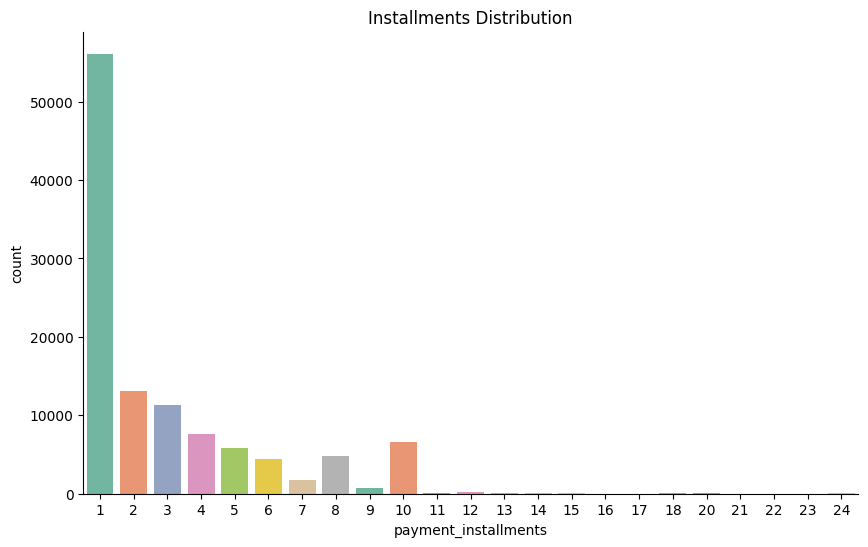

In [40]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df_cus_seg.payment_installments, palette= 'Set2')
plt.title('Installments Distribution')
sns.despine()

In [41]:
# plt.figure(figsize=[10, 6])
# sns.distplot(x = df_cus_seg.payment_value, color='#EE6B6E')
# plt.title('Payment Value')
# sns.despine()

# print(df_cus_seg.payment_value.describe())

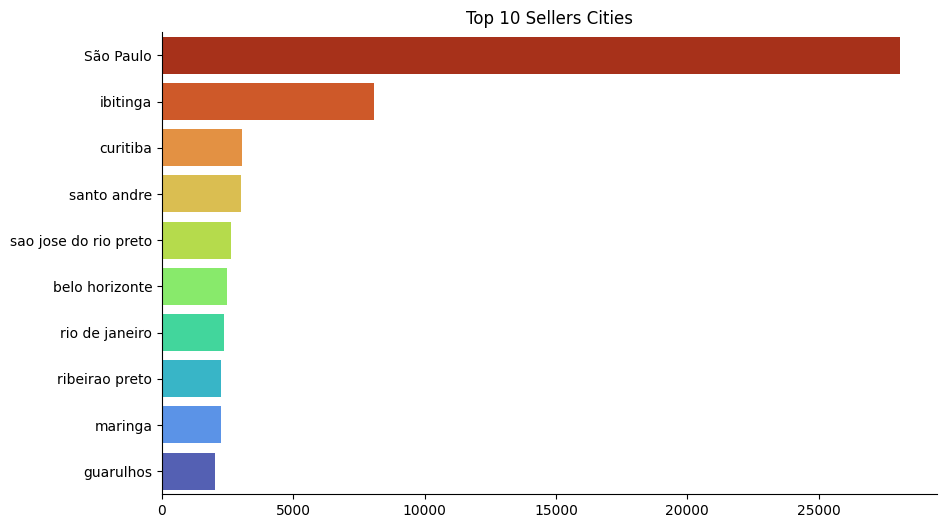

In [42]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.seller_city.value_counts().values[:10], 
            y= df_cus_seg.seller_city.value_counts().index[:10], palette= 'turbo_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

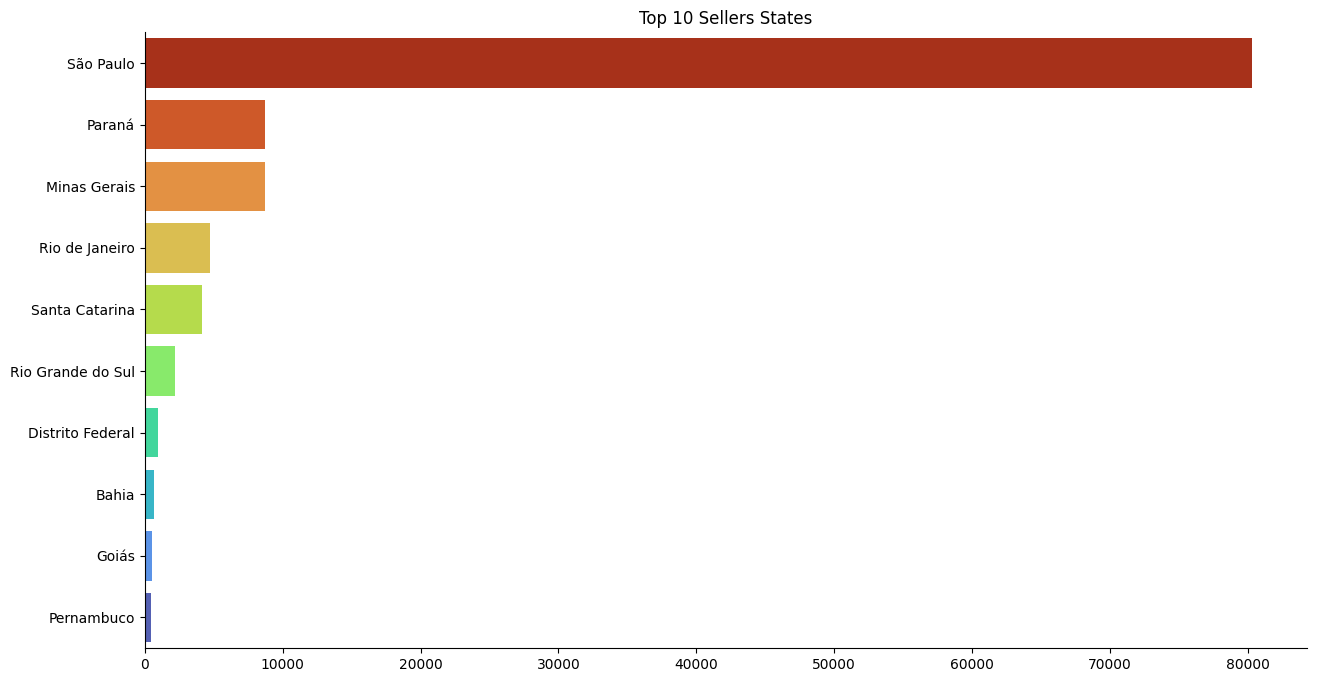

In [43]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df_cus_seg.seller_state.value_counts().values[:10],
            y= df_cus_seg.seller_state.value_counts().index[:10], palette= 'turbo_r')
plt.title('Top 10 Sellers States')
sns.despine()

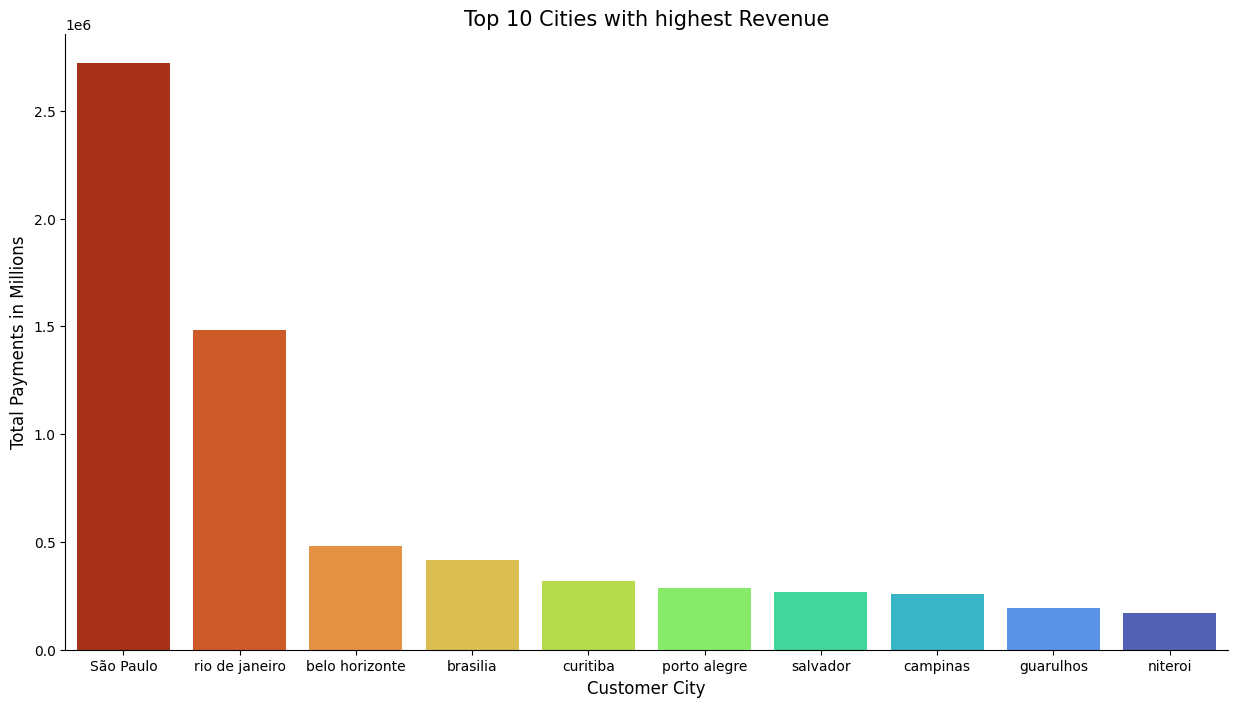

In [44]:
# Which Cities have highest Revenue?
# Group customer city by payment value
revenue_per_city = df_cus_seg.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'turbo_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

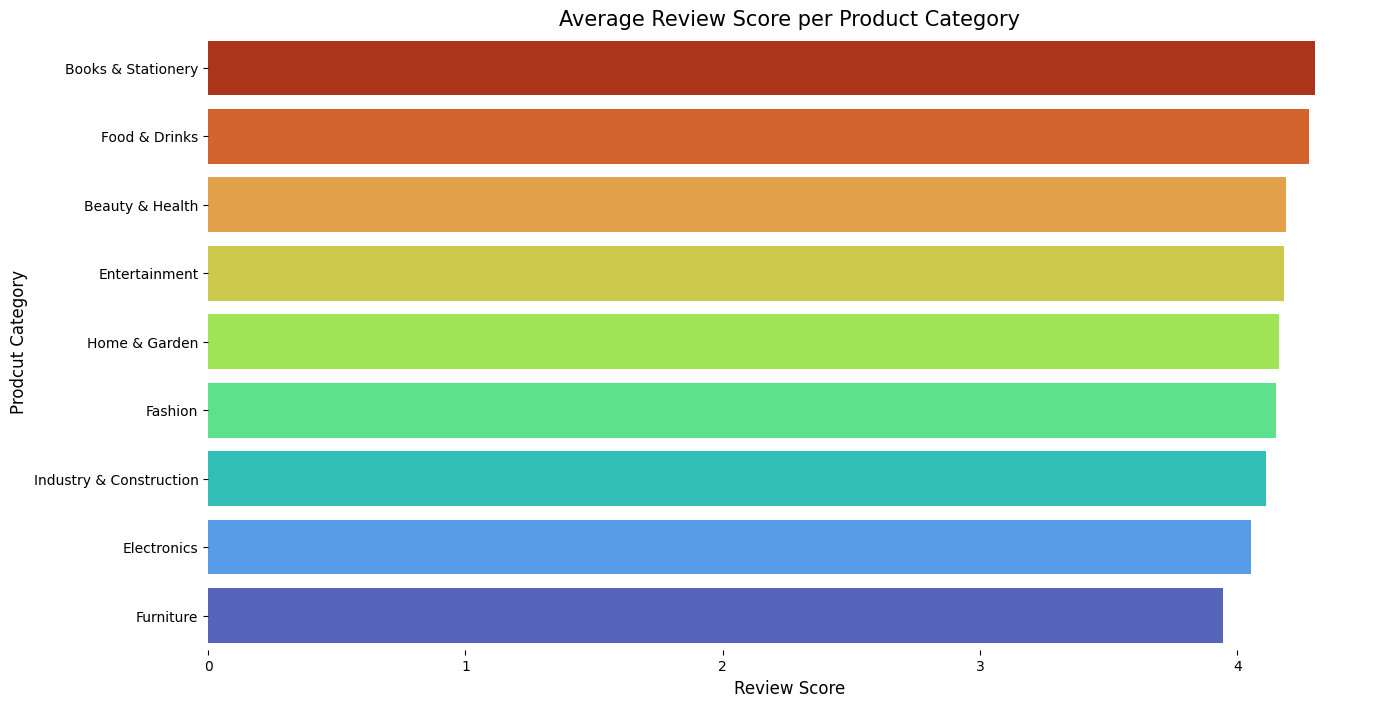

In [45]:
# What is the average review score for each product category ?
# Filter product category with 4.5 or above
review_per_cat = df_cus_seg.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'turbo_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

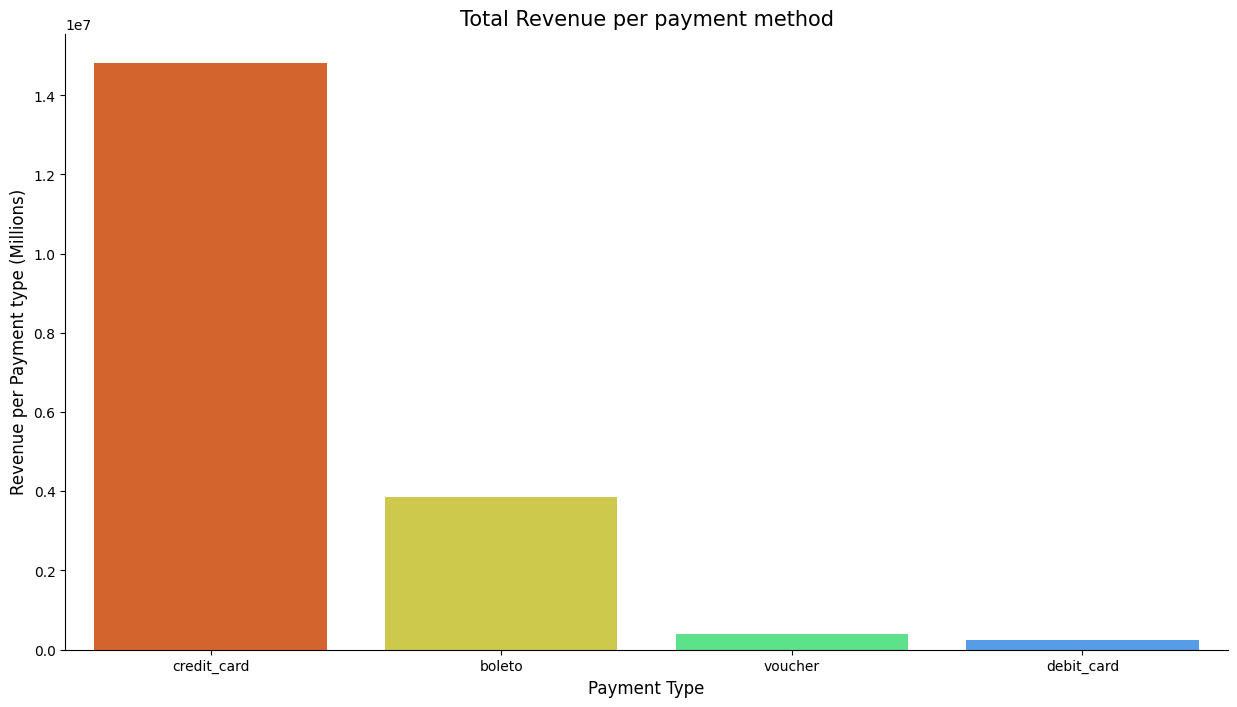

In [46]:
# Are customers more likely to make larger payments using certain payment methods ?
# Group each payment type by average payment value
payment_methods = df_cus_seg.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'turbo_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

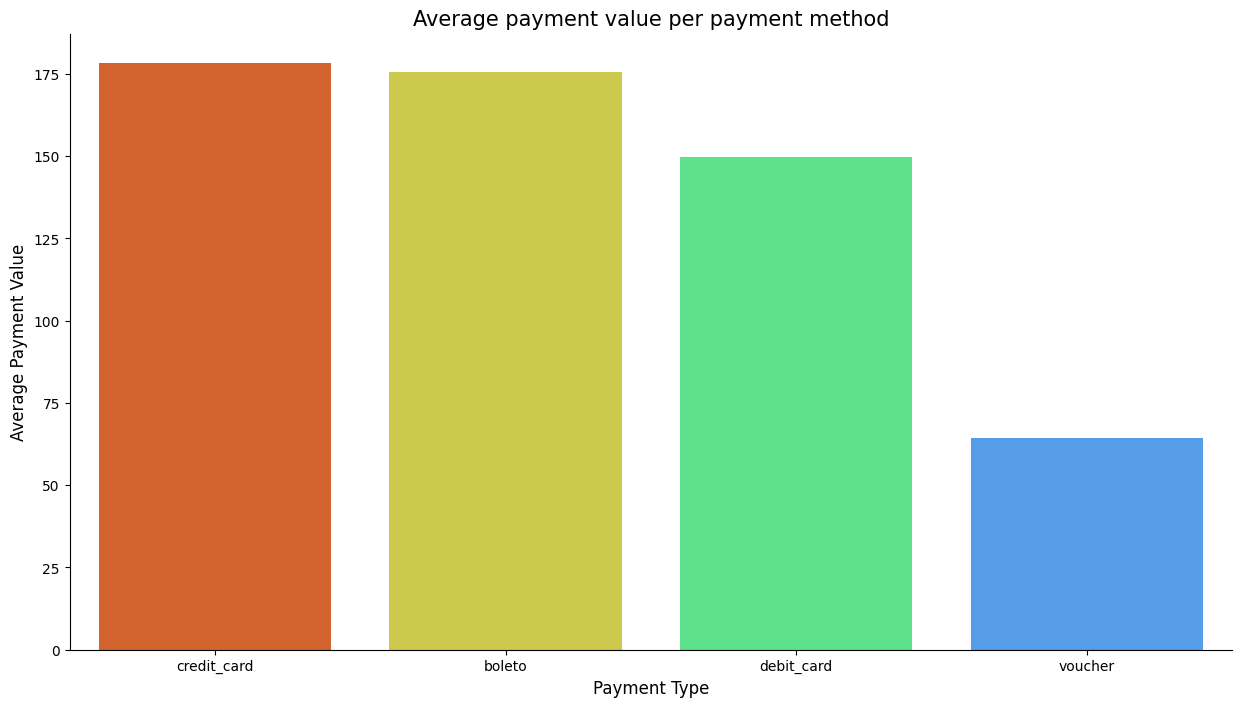

In [47]:
# Group each payment type by average payment value
payment_methods = df_cus_seg.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'turbo_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

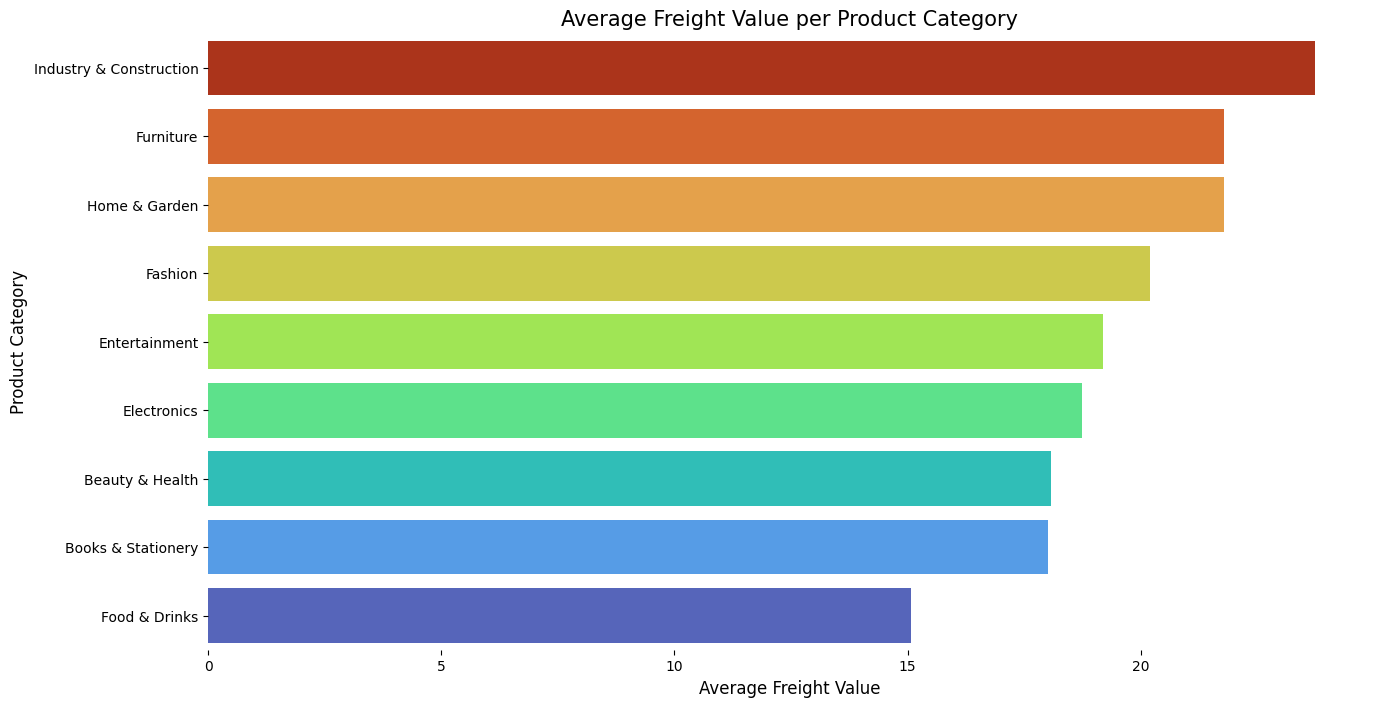

In [48]:
# What is the average freight value for each product category?
# Group product category by average freight value
freight_per_cat = df_cus_seg.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'turbo_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

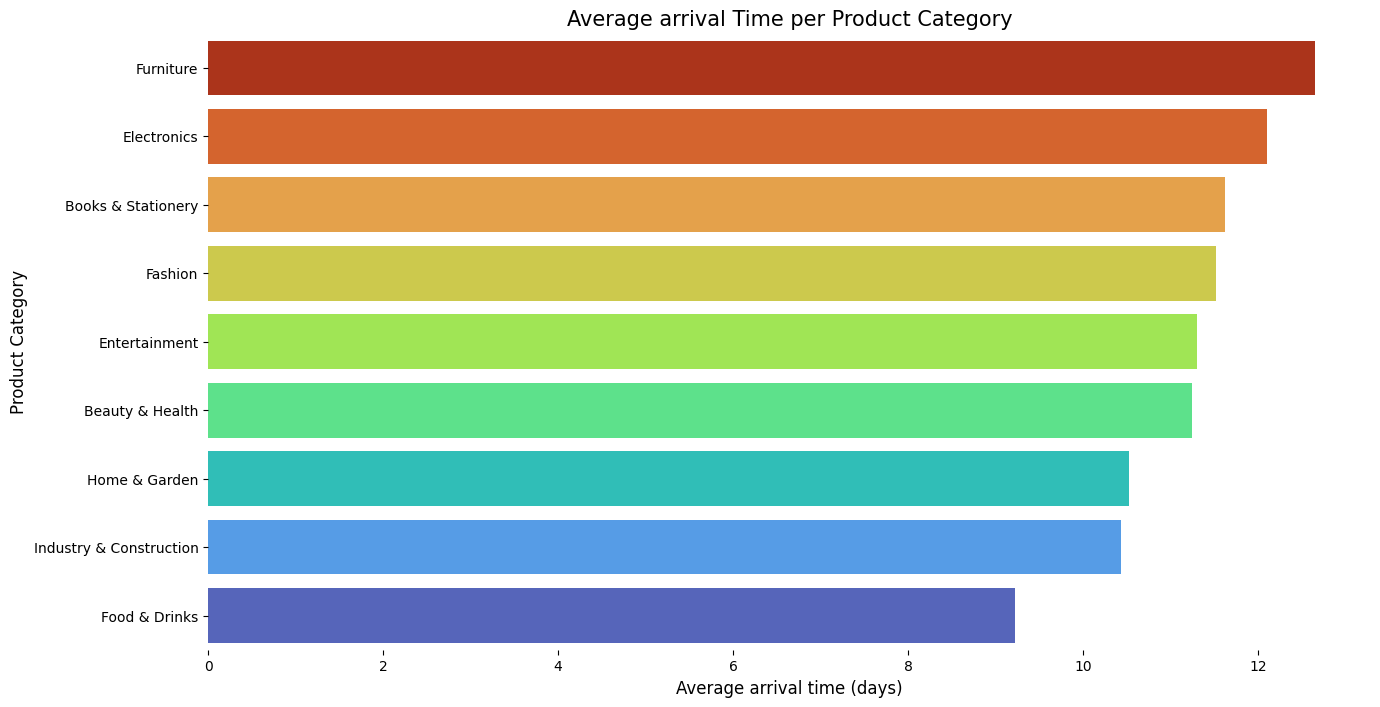

In [49]:
# What is the average shipping time for each product Category?
# Group product category by average arrival time
ship_per_cat = df_cus_seg.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'turbo_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

<Axes: xlabel='review_score', ylabel='count'>

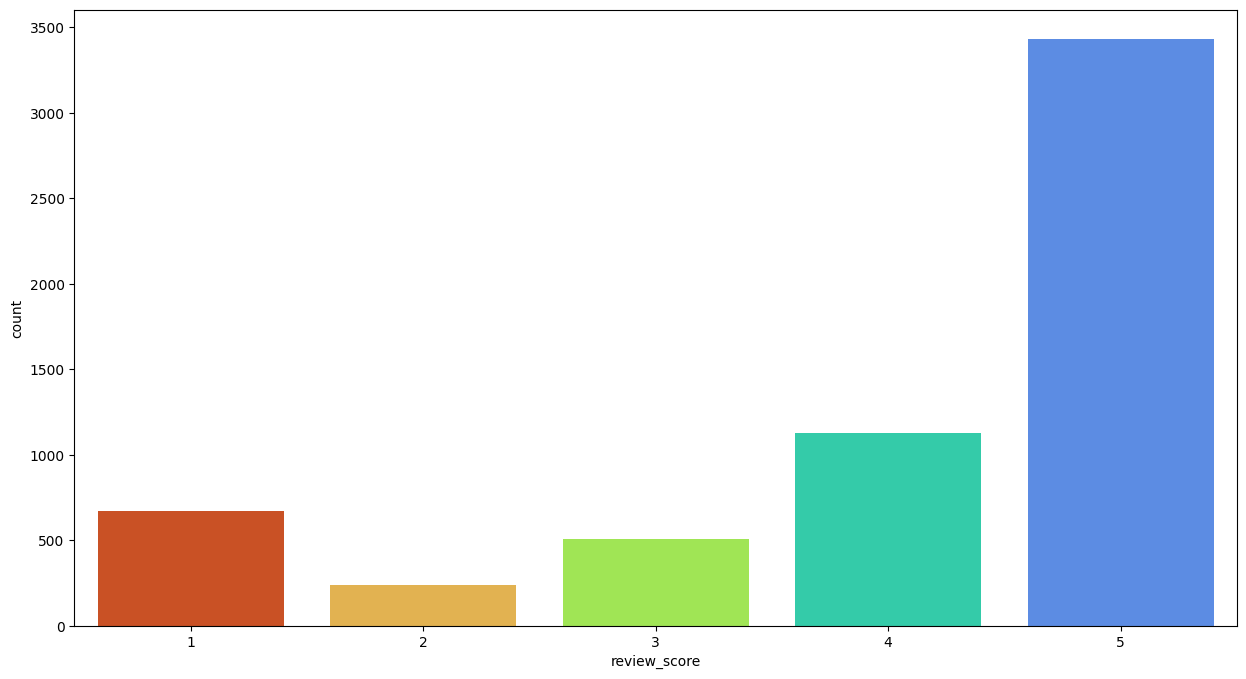

In [50]:
# Are Transactions done with Vouchers lead to high review score?
plt.figure(figsize=[15, 8])
voucher_trans = df_cus_seg[df_cus_seg.payment_type == 'voucher']
sns.countplot(x= voucher_trans.review_score, palette= 'turbo_r')

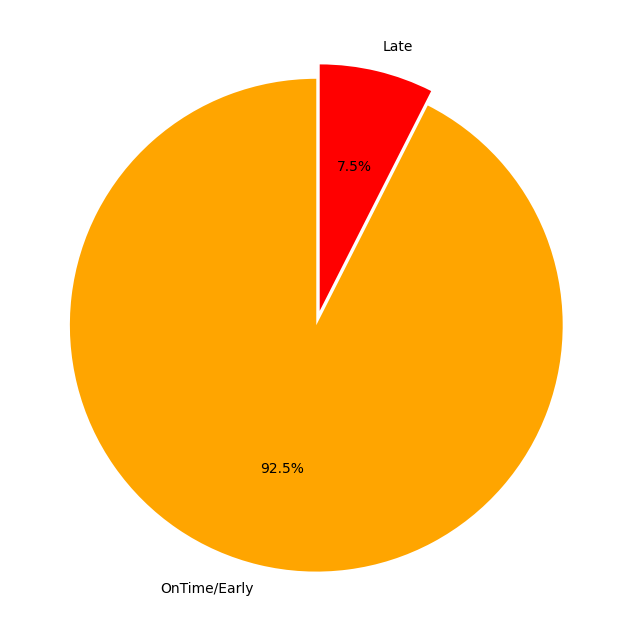

In [51]:
# How accurate are the estimated delivery dates provided to customers?
plt.figure(figsize=[30,8])
Values = df_cus_seg.arrival_status.value_counts().values
Labels = df_cus_seg.arrival_status.value_counts().index
colors = ['#FFA500', '#FF0000']
plt.pie(Values, explode=(0.03, 0.03), labels= ['OnTime/Early', 'Late'], 
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors,
        textprops={'color':"black"});

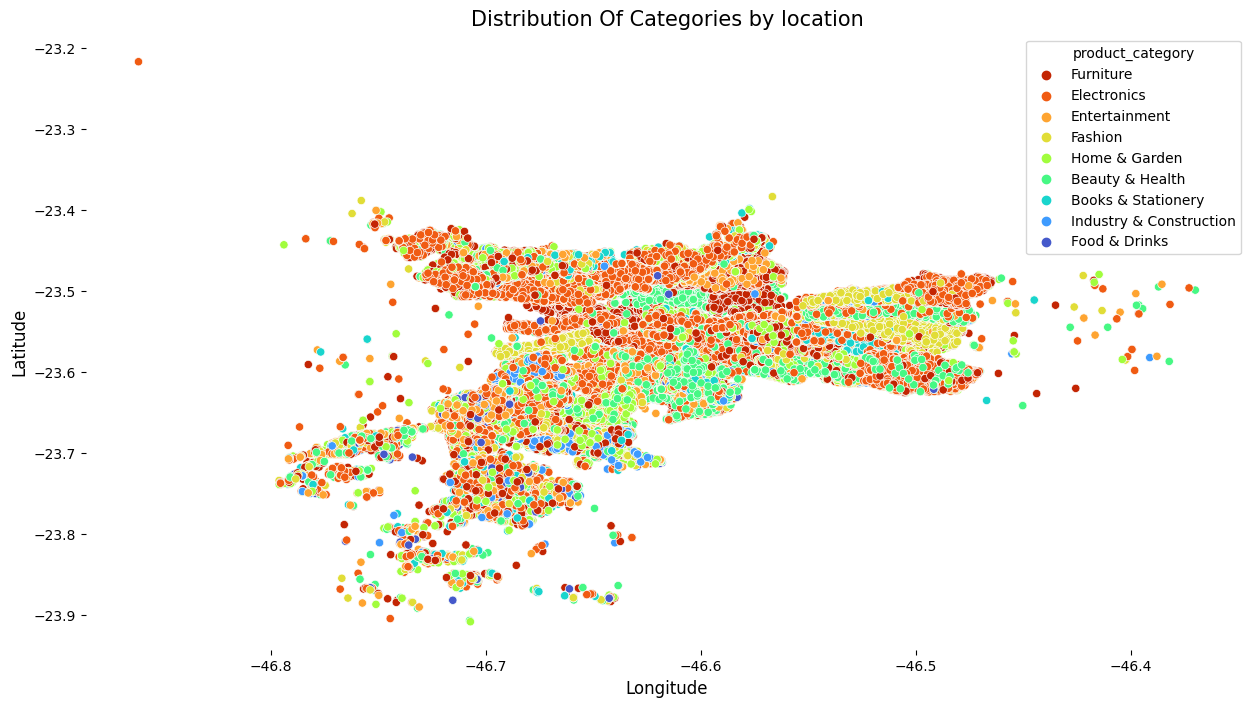

In [52]:

# Distribution of products categories by location
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation.geolocation_lng, 
                y = geolocation.geolocation_lat, 
                hue= df_cus_seg.product_category, palette= 'turbo_r')
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

In [53]:
df_segmentation = df_cus_seg.copy() # use to apply k-mean clustering model

In [54]:
# Data Preprocessing

In [55]:
# Drop Unneccessary Features
# Drop all ids, zip codes, datetimes, review comment and title, product length

df_cus_seg.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 
                 'order_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 
                 'review_creation_date', 'review_answer_timestamp', 'order_item_id', 
                 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 
                 'shipping_limit_date', 'product_category', 'product_category_name' ], axis= 1, inplace= True)

<Axes: >

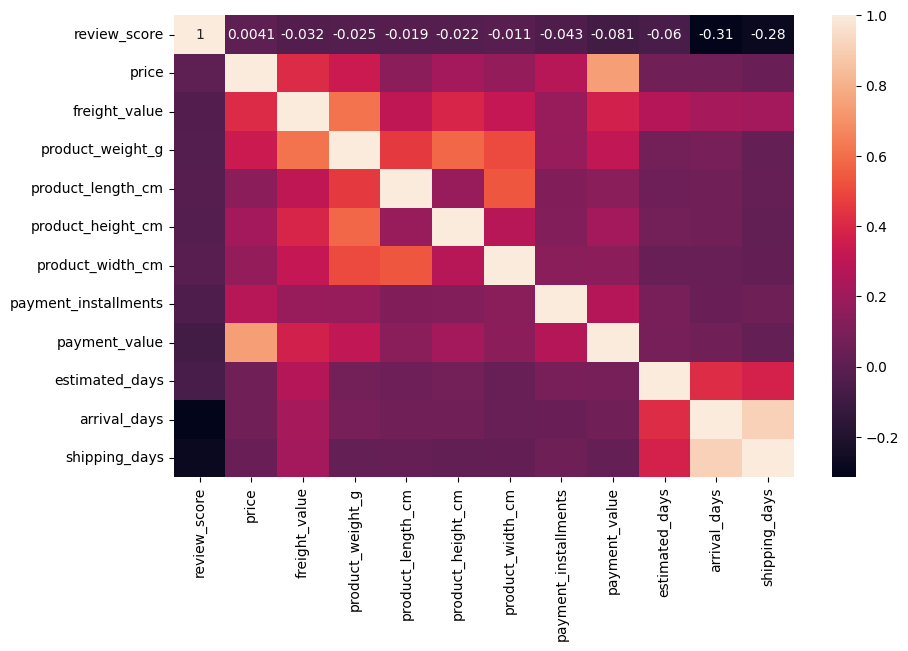

In [56]:
# Show Correlation between Features
plt.figure(figsize= [10, 6])
sns.heatmap(df_cus_seg.corr(), annot= True)

In [57]:
# Remove features with high correlations
df_cus_seg.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [58]:
df_cus_seg.head()

review_score  freight_value  product_weight_g  product_length_cm  \
0             4          21.88            8683.0               54.0   
1             1          24.90            8683.0               54.0   
2             1          24.90            8683.0               54.0   
3             3          15.62            8683.0               54.0   
4             4          30.59            8683.0               54.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0               64.0              31.0  credit_card                     2   
1               64.0              31.0  credit_card                     1   
2               64.0              31.0  credit_card                     1   
3               64.0              31.0  credit_card                     7   
4               64.0              31.0  credit_card                    10   

   payment_value  estimated_days  arrival_days seller_to_carrier_status  \
0         146.87              19             8                     Late   
1         275.79              39            18             OnTime/Early   
2         275.79              39            18             OnTime/Early   
3         140.61              35            18             OnTime/Early   
4         137.58              46            25                     Late   

  arrival_status estimated_delivery_rate arrival_delivery_rate  \
0   OnTime/Early                 Neutral                  Fast   
1   OnTime/Early                    Slow               Neutral   
2   OnTime/Early                    Slow               Neutral   
3   OnTime/Early                    Slow               Neutral   
4   OnTime/Early               Very Slow                  Slow   

  shipping_delivery_rate  
0              Very Fast  
1              Very Fast  
2              Very Fast  
3              Very Fast  
4                   Fast

In [59]:
# Convert Review Score from Multiclass to Binary
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df_cus_seg['review_score'] = df_cus_seg['review_score'].map(encoded_class)

In [60]:
# Split Data into Input Features & Target Variable
X = df_cus_seg.drop('review_score', axis=1)
y = df_cus_seg['review_score']

In [61]:
# Handling Categorical Features
# Handling Ordinal Features ( Label Encoding)
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

In [62]:
# Handling Nominal Features ( One Hot Encoding )
X = pd.get_dummies(X, drop_first=True)

In [63]:
# Split Data into Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

In [64]:
# # Feature Selection

# from sklearn.feature_selection import mutual_info_classif, SelectKBest
# fs = SelectKBest(mutual_info_classif, k= 'all')
# fs.fit(x_train, y_train)
# x_train_fs = fs.transform(x_train)
# x_test_fs = fs.transform(x_test)

In [65]:
# # Plotting Features as per importance

# # Get the indices sorted by most important to least important
# plt.figure(figsize=[15, 8])
# indices = np.argsort(fs.scores_)[::-1]

# # To get your top 10 feature names
# features = []
# for i in range(15):
#     features.append(fs.feature_names_in_[indices[i]])

# # Now plot
# sns.barplot(x = fs.scores_[indices[range(15)]], y = features, palette= 'turbo_r')

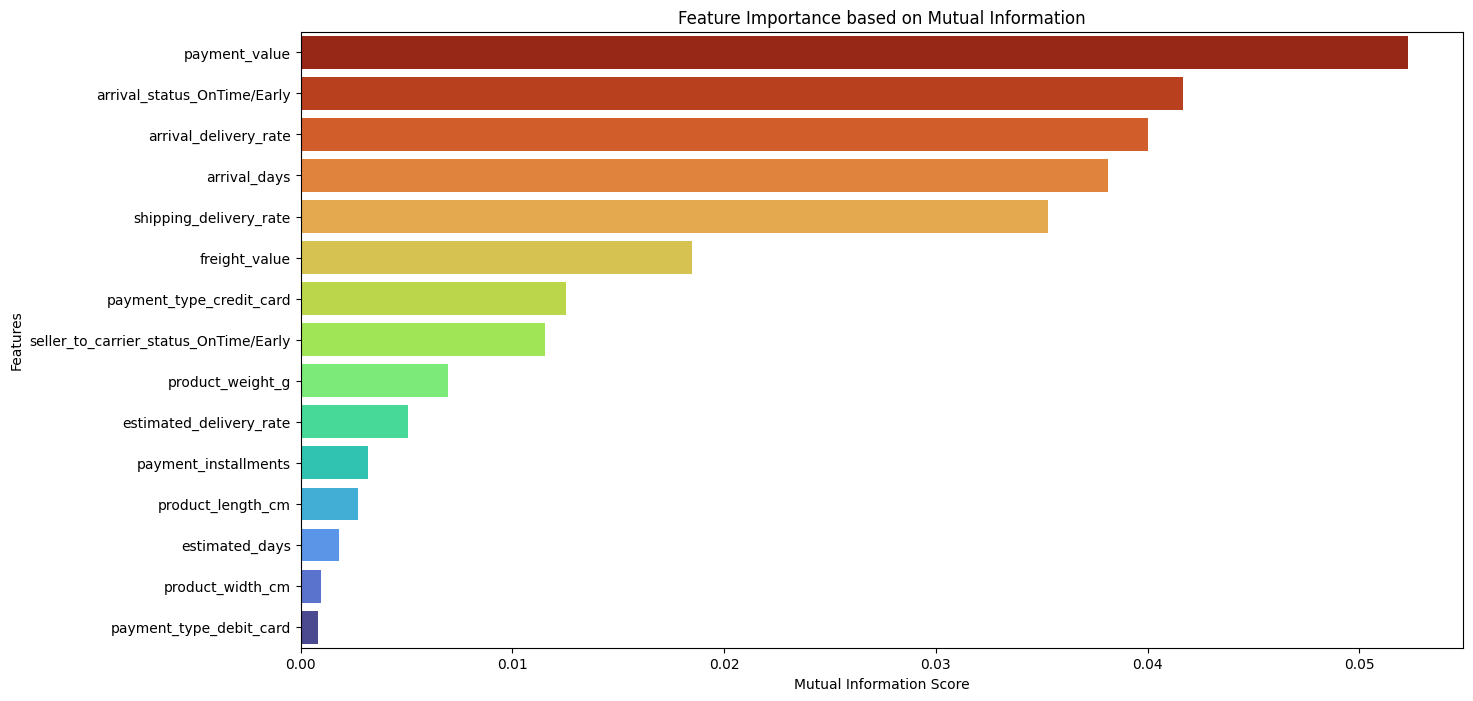

In [66]:
# Feature Selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_train is your feature matrix, and y_train is your target variable
fs = SelectKBest(mutual_info_classif, k='all')
fs.fit(x_train, y_train)

# Transform the data
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 15 feature names
features = list(x_train.columns[indices[:15]])

# Now plot
sns.barplot(x=fs.scores_[indices[:15]], y=features, palette='turbo_r')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Mutual Information')
plt.show()

In [67]:
# Select best 9 Features
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [68]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

In [69]:
# # Select best 9 Features
# from sklearn.feature_selection import mutual_info_classif, SelectKBest
# import pandas as pd

# # Assuming x_train is your feature matrix, and y_train is your target variable
# fs = SelectKBest(mutual_info_classif, k=9)
# fs.fit(x_train, y_train)

# # Transform the data
# x_train_fs = fs.transform(x_train)
# x_test_fs = fs.transform(x_test)

# # Get the selected feature indices
# selected_indices = fs.get_support(indices=True)

# # Get the selected feature names
# selected_feature_names = list(x_train.columns[selected_indices])

# # Create DataFrames with selected features
# x_train_fs = pd.DataFrame(x_train_fs, columns=selected_feature_names)
# x_test_fs = pd.DataFrame(x_test_fs, columns=selected_feature_names)

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

In [71]:
# Convert Array to Dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

In [72]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# sc = StandardScaler(with_mean=False)
# x_train_scaled = sc.fit_transform(x_train_fs)
# x_test_scaled = sc.transform(x_test_fs)

# # Convert Array to Dataframe
# x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_fs.columns)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_fs.columns)

In [73]:
# Handling Imbalance

In [74]:
# Check imbalance percentage
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

# The percentage of customer satisfaction (answering the research question 1)
# Are customers satisfied with their purchase?

Satisfied        76.98
Not Satisfied    23.02
Name: review_score, dtype: float64

In [75]:
# Use SMOTE for handling imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [76]:
# Modeling
# Apply ML Models

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.68      0.44      0.53     69336
    Satisfied       0.59      0.80      0.68     69336

     accuracy                           0.62    138672
    macro avg       0.63      0.62      0.60    138672
 weighted avg       0.63      0.62      0.60    138672

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.38      0.43      0.41      5184
    Satisfied       0.82      0.79      0.81     17334

     accuracy                           0.71     22518
    macro avg       0.60      0.61      0.61     22518
 weighted avg       0.72      0.71      0.71     22518



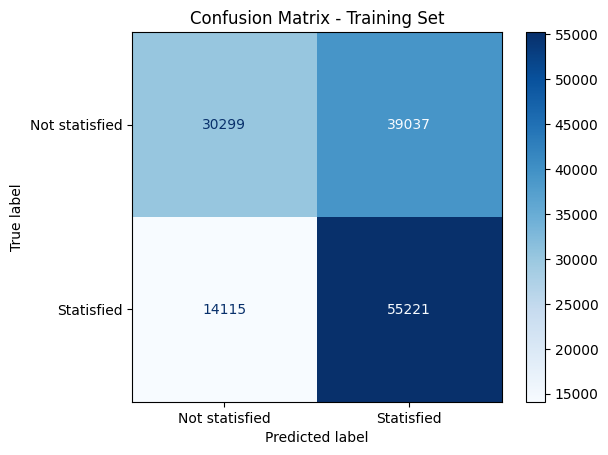

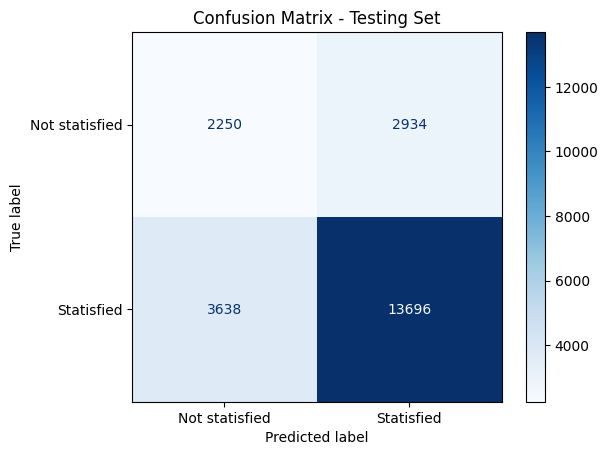

In [77]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, lr.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, lr.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.82      0.94      0.87     69336
    Satisfied       0.92      0.79      0.85     69336

     accuracy                           0.86    138672
    macro avg       0.87      0.86      0.86    138672
 weighted avg       0.87      0.86      0.86    138672

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.36      0.59      0.45      5184
    Satisfied       0.85      0.69      0.76     17334

     accuracy                           0.67     22518
    macro avg       0.61      0.64      0.61     22518
 weighted avg       0.74      0.67      0.69     22518



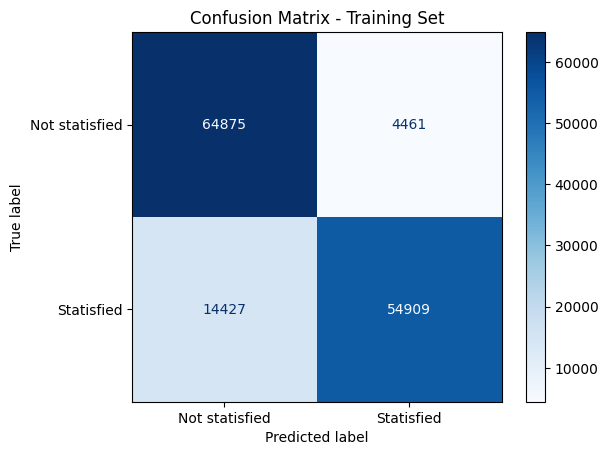

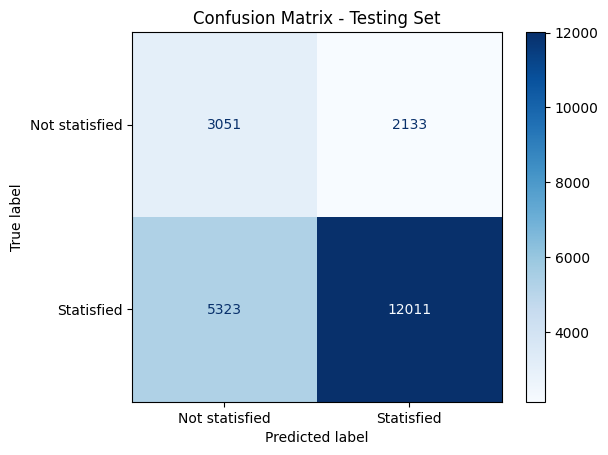

In [78]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, knn.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, knn.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      1.00      1.00     69336
    Satisfied       1.00      0.99      1.00     69336

     accuracy                           1.00    138672
    macro avg       1.00      1.00      1.00    138672
 weighted avg       1.00      1.00      1.00    138672

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.43      0.54      0.48      5184
    Satisfied       0.85      0.78      0.82     17334

     accuracy                           0.73     22518
    macro avg       0.64      0.66      0.65     22518
 weighted avg       0.75      0.73      0.74     22518



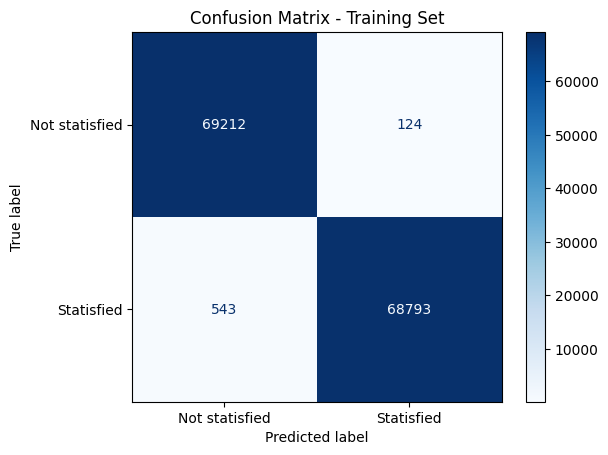

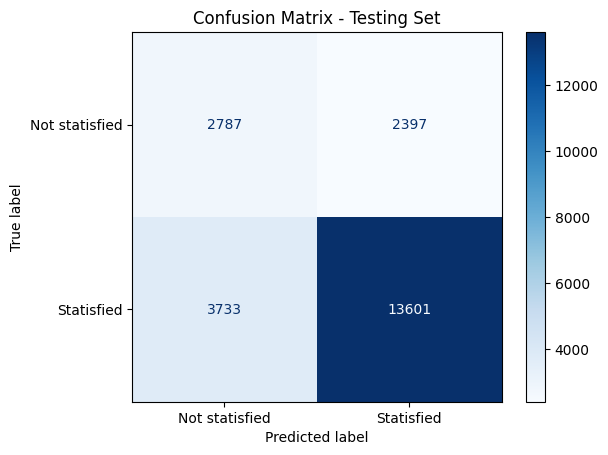

In [79]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, dt.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, dt.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, rf.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, rf.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      0.99      1.00     69336
    Satisfied       0.99      1.00      1.00     69336

     accuracy                           1.00    138672
    macro avg       1.00      1.00      1.00    138672
 weighted avg       1.00      1.00      1.00    138672

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.56      0.50      0.53      5184
    Satisfied       0.86      0.88      0.87     17334

     accuracy                           0.79     22518
    macro avg       0.71      0.69      0.70     22518
 weighted avg       0.79      0.79      0.79     22518



Evaluation on Training 
               precision    recall  f1-score   support

           0       0.83      0.68      0.75     69336
           1       0.73      0.86      0.79     69336

    accuracy                           0.77    138672
   macro avg       0.78      0.77      0.77    138672
weighted avg       0.78      0.77      0.77    138672

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.42      0.42      0.42      5184
           1       0.83      0.83      0.83     17334

    accuracy                           0.74     22518
   macro avg       0.63      0.62      0.63     22518
weighted avg       0.73      0.74      0.73     22518



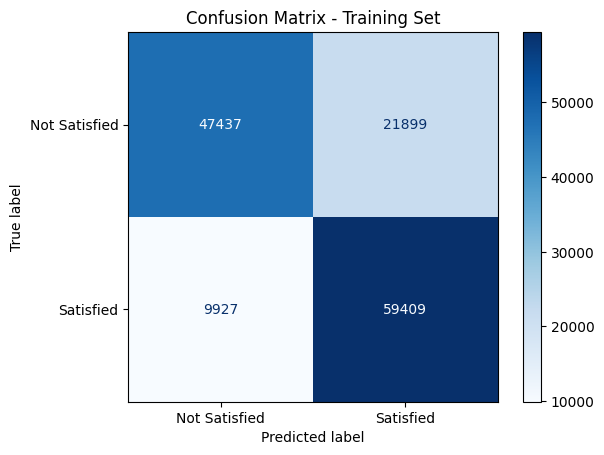

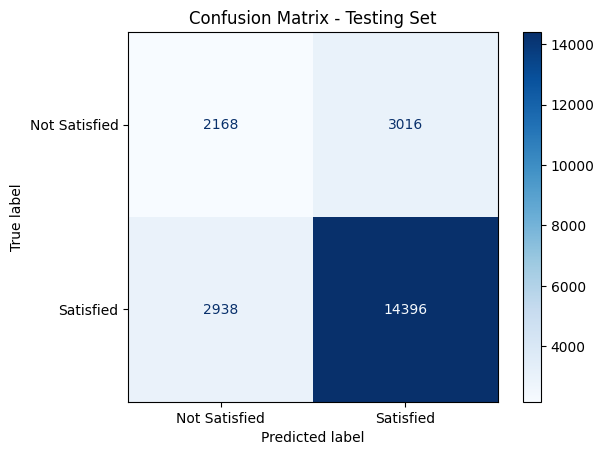

In [81]:
#  XGboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Label encode the target variables
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.fit_transform(y_test)

# Train XGBoost model
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

# Evaluate on training set
print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))

# Evaluate on testing set
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_xg, xg.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test_xg, xg.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Satisfied', 'Satisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Satisfied', 'Satisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [82]:
# Hyperparameter Tuning

# XGboost
# Create an instance of XGBClassifier with specified hyperparameters
final_xg_model = XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=200)

# Train the XGBoost model on the resampled training data
final_xg_model.fit(x_train_resampled, y_train_xg)

# Evaluate the performance of the trained model on the training set
print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))

# Evaluate the performance of the trained model on the testing set
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))


Evaluation on Training 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83     69336
           1       0.80      0.91      0.85     69336

    accuracy                           0.84    138672
   macro avg       0.85      0.84      0.84    138672
weighted avg       0.85      0.84      0.84    138672

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.47      0.44      0.45      5184
           1       0.84      0.85      0.84     17334

    accuracy                           0.76     22518
   macro avg       0.65      0.65      0.65     22518
weighted avg       0.75      0.76      0.75     22518



In [ ]:
# The model performs well on the training set, showing a good balance between precision and recall for both classes.
# On the testing set, the model maintains a relatively high precision and recall for the 'Satisfied' class, indicating its ability to correctly identify satisfied customers.
# However, the model has lower precision and recall for the 'Not Satisfied' class, suggesting some difficulty in identifying dissatisfied customers.

In [84]:
# RandomForest
final_rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.78      0.52      0.63     69336
    Satisfied       0.64      0.86      0.73     69336

     accuracy                           0.69    138672
    macro avg       0.71      0.69      0.68    138672
 weighted avg       0.71      0.69      0.68    138672

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.42      0.43      5184
    Satisfied       0.83      0.84      0.83     17334

     accuracy                           0.74     22518
    macro avg       0.63      0.63      0.63     22518
 weighted avg       0.74      0.74      0.74     22518



In [ ]:
# The model also demonstrates a balance between precision and recall for the 'Satisfied' class on the training set.
# On the testing set, the model has good precision and recall for the 'Satisfied' class but lower performance for the 'Not Satisfied' class.

In [85]:
# XGboost is selected for pipeline as it provides highest performance on testing

# XGBoost appears to have a slight edge in terms of overall performance on the testing set, with higher accuracy and balanced precision and recall for both classes.

In [86]:
# Pipeline 

In [87]:
df_pipeline = df_cus_seg.copy()
df_pipeline.head()


review_score  freight_value  product_weight_g  product_length_cm  \
0      Satisfied          21.88            8683.0               54.0   
1  Not Satisfied          24.90            8683.0               54.0   
2  Not Satisfied          24.90            8683.0               54.0   
3  Not Satisfied          15.62            8683.0               54.0   
4      Satisfied          30.59            8683.0               54.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0               64.0              31.0  credit_card                     2   
1               64.0              31.0  credit_card                     1   
2               64.0              31.0  credit_card                     1   
3               64.0              31.0  credit_card                     7   
4               64.0              31.0  credit_card                    10   

   payment_value  estimated_days  arrival_days seller_to_carrier_status  \
0         146.87              19             8                     Late   
1         275.79              39            18             OnTime/Early   
2         275.79              39            18             OnTime/Early   
3         140.61              35            18             OnTime/Early   
4         137.58              46            25                     Late   

  arrival_status estimated_delivery_rate arrival_delivery_rate  \
0   OnTime/Early                 Neutral                  Fast   
1   OnTime/Early                    Slow               Neutral   
2   OnTime/Early                    Slow               Neutral   
3   OnTime/Early                    Slow               Neutral   
4   OnTime/Early               Very Slow                  Slow   

  shipping_delivery_rate  
0              Very Fast  
1              Very Fast  
2              Very Fast  
3              Very Fast  
4                   Fast

In [88]:
# Encoding Review score to 0 and 1
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

In [89]:
# Split Input Features and Targe Variable
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

# Split into Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

# Prepare Numerical Features
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_installments',
       'payment_value', 'estimated_days', 'arrival_days'],
      dtype='object')

In [91]:
# Prepare Categorical Features
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [ ]:
# Numerical and Categorical Feature Preparation

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')), 
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

In [92]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [ ]:
# Pipeline Construction

In [93]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='median')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_installments',
       'payment_value', 'estimat...
                                ('Cat Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoding',
                                                  OneHotEncoder(drop='first')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object'))])

In [94]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()), 
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [95]:
# Model Training
print(final_pipeline.fit(x_train, y_train))

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [96]:
import joblib
joblib.dump(final_pipeline, 'OlistSatisfaction.bkl')

# save the model

['OlistClassification.bkl']

In [97]:
df_cus_seg.columns

Index(['review_score', 'freight_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'estimated_days', 'arrival_days', 'seller_to_carrier_status',
       'arrival_status', 'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [98]:
# Customer segmentation
# Get last transaction date to help calculate Recency
max_trans_date = max(df_segmentation.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

In [99]:
# Create Recency, Frequency and Monetary Features
from datetime import datetime 

rfm_table = df_segmentation.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'order_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

order_purchase_timestamp  order_id  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2                       110         1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       113         1   
0000f46a3911fa3c0805444483337064                       536         1   
0000f6ccb0745a6a4b88665a16c9f078                       320         1   
0004aac84e0df4da2b147fca70cf8255                       287         1   
...                                                    ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684                       446         2   
fffea47cd6d3cc0a88bd621562a9d061                       261         1   
ffff371b4d645b6ecea244b27531430a                       567         1   
ffff5962728ec6157033ef9805bacc48                       118         1   
ffffd2657e2aad2907e67c3e9daecbeb                       483         1   

                                  payment_value  
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2         141.90  
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19  
0000f46a3911fa3c0805444483337064          86.22  
0000f6ccb0745a6a4b88665a16c9f078          43.62  
0004aac84e0df4da2b147fca70cf8255         196.89  
...                                         ...  
fffcf5a5ff07b0908bd4e2dbc735a684        4134.84  
fffea47cd6d3cc0a88bd621562a9d061          84.58  
ffff371b4d645b6ecea244b27531430a         112.46  
ffff5962728ec6157033ef9805bacc48         133.69  
ffffd2657e2aad2907e67c3e9daecbeb          71.56  

[91013 rows x 3 columns]

In [100]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','order_id':'Frequency','payment_value':'Monetary'}, inplace=True)
rfm_table

# Recency: How recently a customer made a purchase.
# Frequency: How often a customer makes a purchase.
# Monetary: The total monetary value of a customer's purchases.

Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19
0000f46a3911fa3c0805444483337064      536          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62
0004aac84e0df4da2b147fca70cf8255      287          1    196.89
...                                   ...        ...       ...
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58
ffff371b4d645b6ecea244b27531430a      567          1    112.46
ffff5962728ec6157033ef9805bacc48      118          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56

[91013 rows x 3 columns]

In [101]:
# Create Recency, Frequency and Monetary scores
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequency'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

Recency  Frequency  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2       1       3  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1  
0000f46a3911fa3c0805444483337064       1       2  
0000f6ccb0745a6a4b88665a16c9f078       1       1  
0004aac84e0df4da2b147fca70cf8255       1       3  
...                                  ...     ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4  
fffea47cd6d3cc0a88bd621562a9d061       4       2  
ffff371b4d645b6ecea244b27531430a       4       2  
ffff5962728ec6157033ef9805bacc48       4       3  
ffffd2657e2aad2907e67c3e9daecbeb       4       2  

[91013 rows x 6 columns]

In [102]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table, palette= 'turbo_r')
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

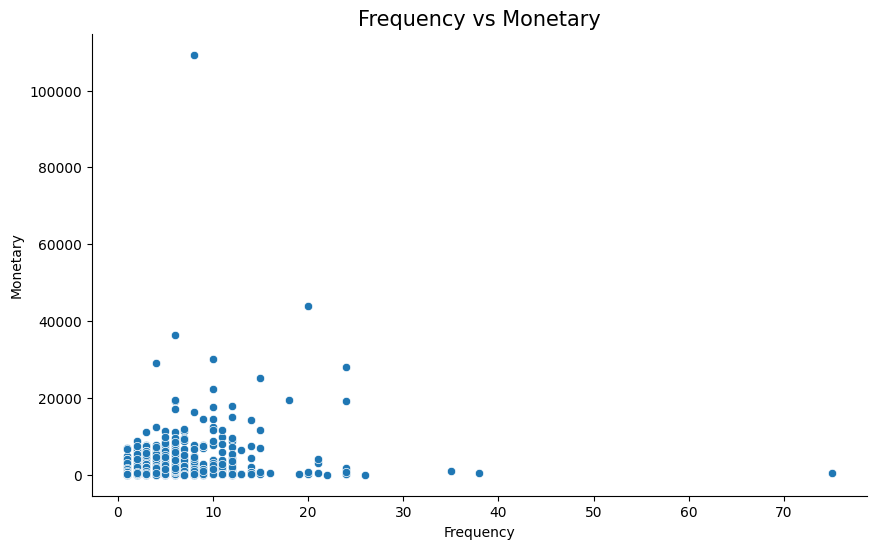

In [103]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_table, palette= 'turbo_r')
plt.title('Frequency vs Monetary', fontsize= 15)
sns.despine()

In [104]:
# Calculate RFM Score
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

Recency  Frequency  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311  
0000f46a3911fa3c0805444483337064       1       2        112  
0000f6ccb0745a6a4b88665a16c9f078       1       1        211  
0004aac84e0df4da2b147fca70cf8255       1       3        213  
...                                  ...     ...        ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144  
fffea47cd6d3cc0a88bd621562a9d061       4       2        242  
ffff371b4d645b6ecea244b27531430a       4       2        142  
ffff5962728ec6157033ef9805bacc48       4       3        343  
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142  

[91013 rows x 7 columns]

In [105]:
# Cluster customers based on RFM Score
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal Customer'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist Customer'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New Customer'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential Customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'At-Risk Customers' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

Recency  Frequency  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311   
0000f46a3911fa3c0805444483337064       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       1       1        211   
0004aac84e0df4da2b147fca70cf8255       1       3        213   
...                                  ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       4       2        242   
ffff371b4d645b6ecea244b27531430a       4       2        142   
ffff5962728ec6157033ef9805bacc48       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[91013 rows x 8 columns]

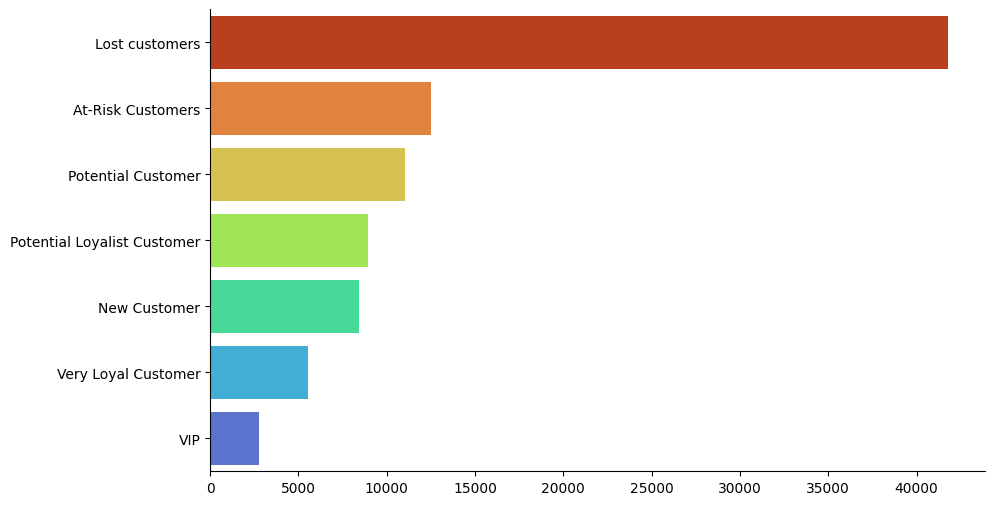

In [106]:
# Plot frquency of each segment
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'turbo_r')
sns.despine()

In [107]:
# check outliers

rfm_table.describe()

Recency     Frequency       Monetary     rfm_score
count  91013.000000  91013.000000   91013.000000  91013.000000
mean     235.176865      1.237043     211.902232    277.935075
std      152.294832      0.843628     632.109321    112.478755
min       -1.000000      1.000000       9.590000    111.000000
25%      112.000000      1.000000      63.700000    211.000000
50%      216.000000      1.000000     112.710000    311.000000
75%      344.000000      1.000000     201.990000    411.000000
max      694.000000     75.000000  109312.640000    444.000000

<Axes: xlabel='Recency'>

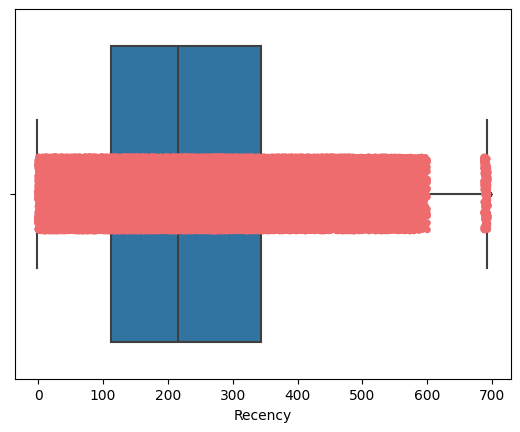

In [108]:
# Recency
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color='#EE6B6E') 

<Axes: xlabel='Frequency'>

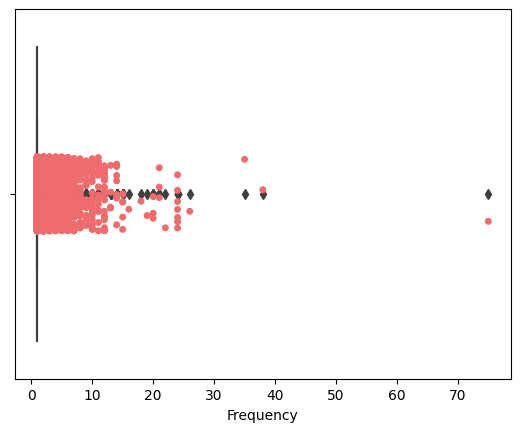

In [109]:
# Frequency
sns.boxplot(x= rfm_table.Frequency)
sns.stripplot(x = rfm_table.Frequency, color='#EE6B6E')

<Axes: xlabel='Monetary'>

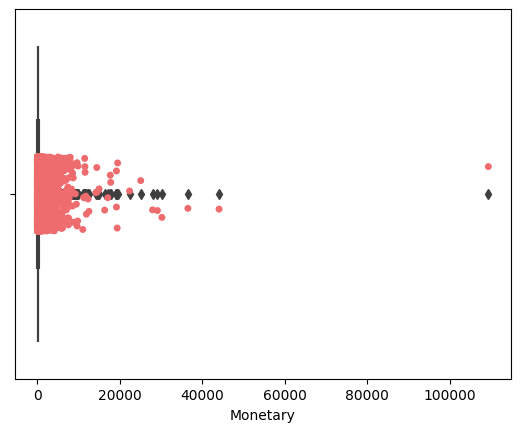

In [110]:
# Monetary 
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color='#EE6B6E')

In [111]:
# Remove Extreme 5% of Outliers
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequency 5% Outliers Limits:', np.percentile(rfm_table.Frequency, 5), np.percentile(rfm_table.Frequency, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 22.0 517.0
Frequency 5% Outliers Limits: 1.0 2.0
Monetary 5% Outliers Limits: 32.69 661.1879999999993


In [112]:
# Remove Outliers for Recency & Monetary (Extreme 5%)
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

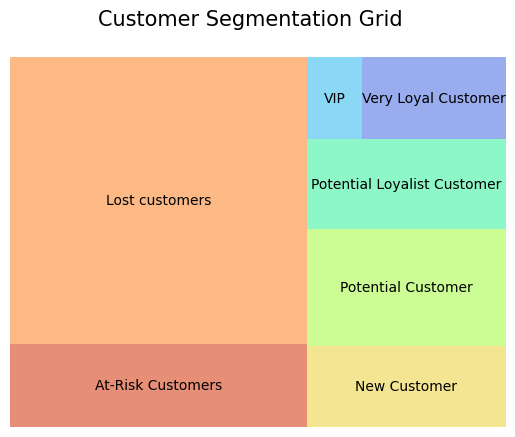

In [113]:
# Customer Segmentation Grid

import squarify
# Assuming Sizes and labels are defined
plt.rc('font', size=10)
Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()

# Choose a color palette
color_palette = sns.color_palette("turbo_r", n_colors=len(Sizes))

squarify.plot(sizes=Sizes.values, label=Sizes.index, color=color_palette, alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=15)
plt.axis('off')  # Turn off axis labels
plt.show()

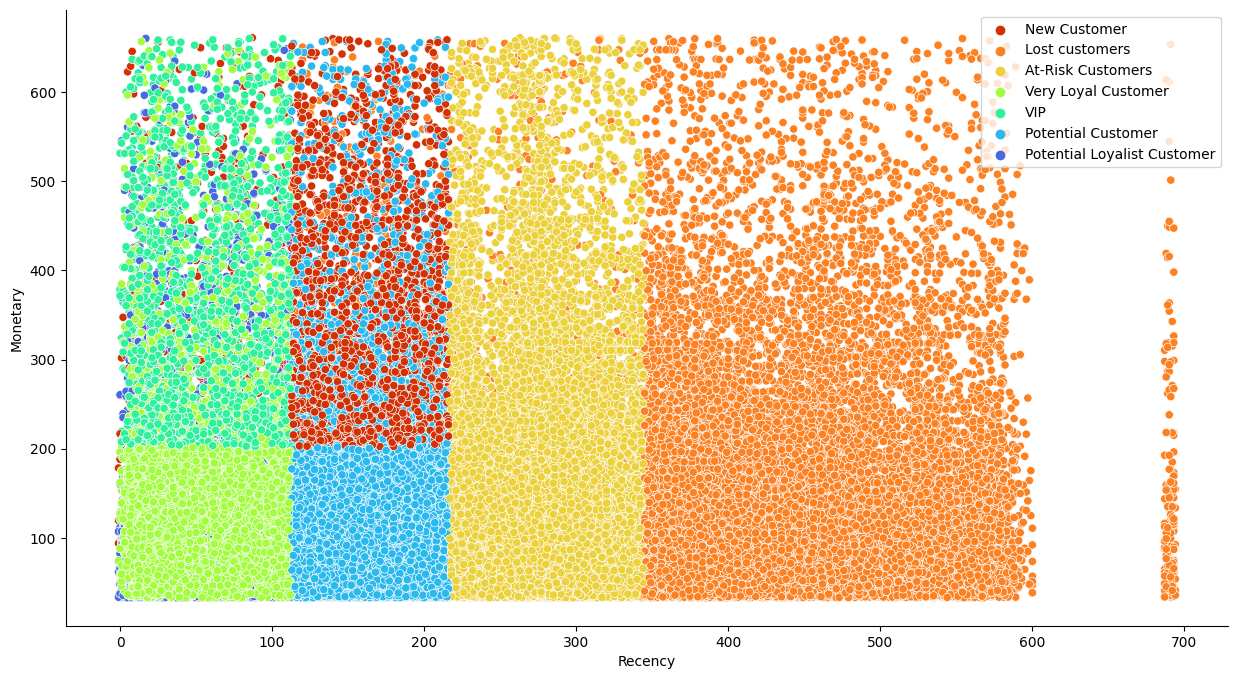

In [114]:
# Recency & Monetary Plot

plt.figure(figsize= [15, 8])
colors = sns.color_palette("turbo_r", n_colors=len(Sizes))
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

<Axes: ylabel='Density'>

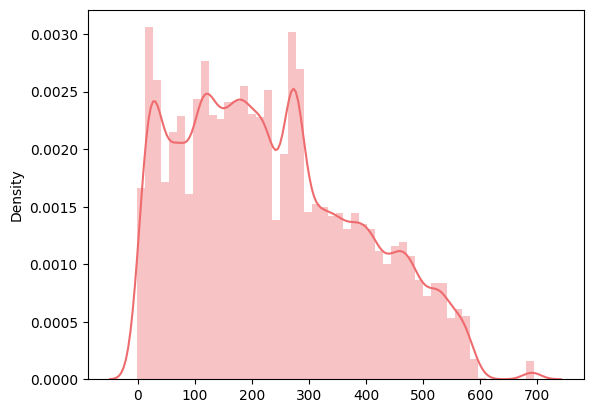

In [115]:
# Check Skeweness

# Recency
sns.distplot(x= rfm_table.Recency, color='#EE6B6E')

<Axes: ylabel='Density'>

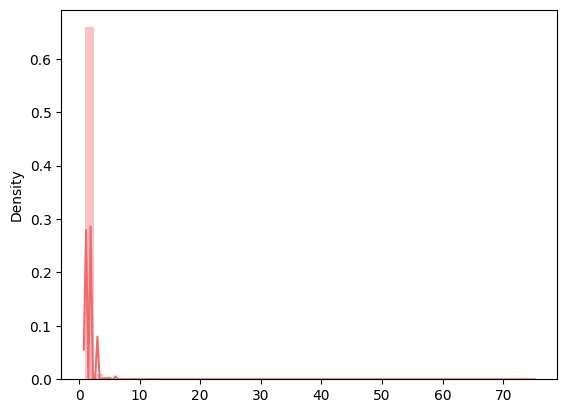

In [116]:
# Frequency
sns.distplot(x= rfm_table.Frequency, color='#EE6B6E')

<Axes: ylabel='Density'>

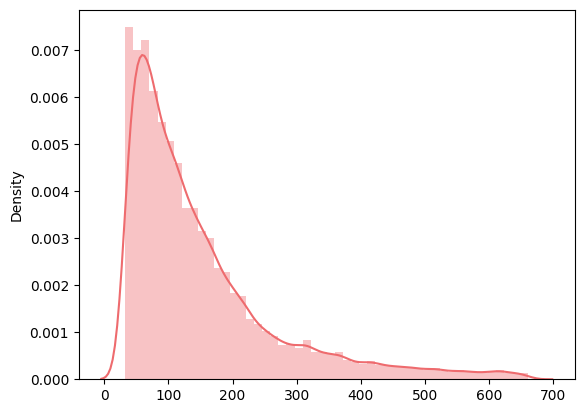

In [117]:
# Monetary
sns.distplot(x= rfm_table.Monetary, color='#EE6B6E')

In [118]:
# Apply Log function to handle skeweness for Frequency & Monetary
for i in ['Frequency', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

<Axes: ylabel='Density'>

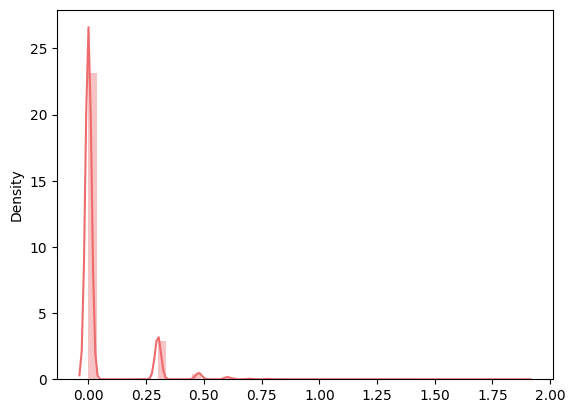

In [119]:
# Frequency
sns.distplot(x= rfm_table.Frequency, color='#EE6B6E')

<Axes: ylabel='Density'>

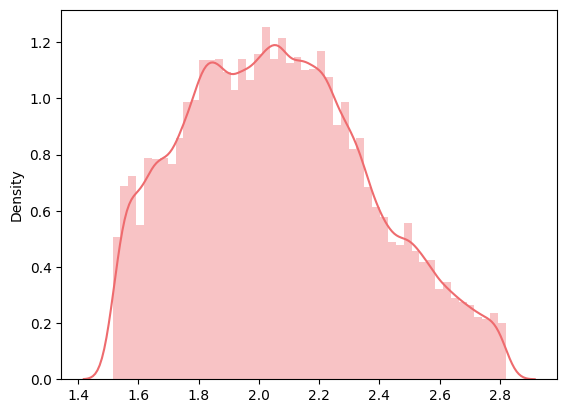

In [120]:
# Monetary
sns.distplot(x= rfm_table.Monetary, color='#EE6B6E')

In [121]:
# K-Mean clustering
df_cluster = df_segmentation[['freight_value', 'price', 'payment_value', 'payment_installments']]
df_cluster

freight_value   price  payment_value  payment_installments
0               21.88  124.99         146.87                     2
1               24.90  112.99         275.79                     1
2               24.90  112.99         275.79                     1
3               15.62  124.99         140.61                     7
4               30.59  106.99         137.58                    10
...               ...     ...            ...                   ...
112582          15.47  145.90         161.37                     1
112583          22.28   49.90          72.18                     3
112584          88.46  135.98         224.44                     6
112585          31.93  167.99         167.79                     5
112586          31.93  167.99          32.13                     1

[112587 rows x 4 columns]

In [122]:
df_cluster.columns

Index(['freight_value', 'price', 'payment_value', 'payment_installments'], dtype='object')

In [123]:
# Take sample from data (10k)
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

In [124]:
# Save sample as CSV for deployment

df_sample.to_csv('Clustering_Sample.csv')

In [125]:
df_sample.describe()

freight_value         price  payment_value  payment_installments
count   10000.000000  10000.000000   10000.000000          10000.000000
mean       20.380088    121.722498     177.069432              2.976000
std        17.045427    185.981914     310.035068              2.830234
min         0.000000      1.200000       0.000000              1.000000
25%        13.110000     39.990000      61.790000              1.000000
50%        16.420000     76.990000     110.160000              1.000000
75%        21.305000    134.900000     189.737500              4.000000
max       375.280000   4059.000000   13664.080000             24.000000

In [126]:
# Drop freight values with zeros

df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

In [127]:
# Take copy for Pipeline

cluster_pipeline = df_sample.copy()

for i in ['freight_value', 'price', 'payment_value', 'payment_installments']:
    df_sample[i] = np.log10(df_sample[i])

In [128]:
print(df_sample.isnull().sum())
df_sample.describe()


freight_value           0
price                   0
payment_value           0
payment_installments    0
dtype: int64


freight_value        price  payment_value  payment_installments
count    9962.000000  9962.000000    9962.000000           9962.000000
mean        1.236682     1.878920           -inf              0.312303
std         0.242078     0.400654            NaN              0.357993
min        -2.000000     0.079181           -inf              0.000000
25%         1.120903     1.601951       1.790637              0.000000
50%         1.216430     1.886180       2.042910              0.000000
75%         1.329398     2.130012       2.278679              0.602060
max         2.574355     3.608419       4.135580              1.380211

In [129]:
# Remove rows with NaN values
df_sample = df_sample.dropna()

# Replace infinite values with a large finite value
df_sample.replace([np.inf, -np.inf], np.nan, inplace=True)
df_sample.fillna(1e10, inplace=True)  # Replace with a large finite value

print(df_sample.max())


freight_value           2.574355e+00
price                   3.608419e+00
payment_value           1.000000e+10
payment_installments    1.380211e+00
dtype: float64


In [130]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean= False)
data_scaled = sc.fit_transform(df_sample)

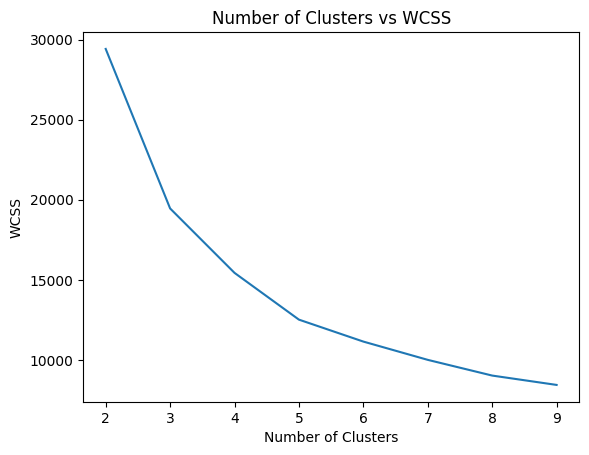

In [131]:
# Detecting number of clusters using Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2, 10):
    kmean = KMeans(n_clusters=i)  
    y_pred_kmean = kmean.fit_predict(data_scaled)
    wcss.append(kmean.inertia_)
    scores.append(silhouette_score(data_scaled, y_pred_kmean))

plt.plot(range(2, 10), wcss)
plt.title('Number of Clusters vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Text(0, 0.5, 'silhouette_score')

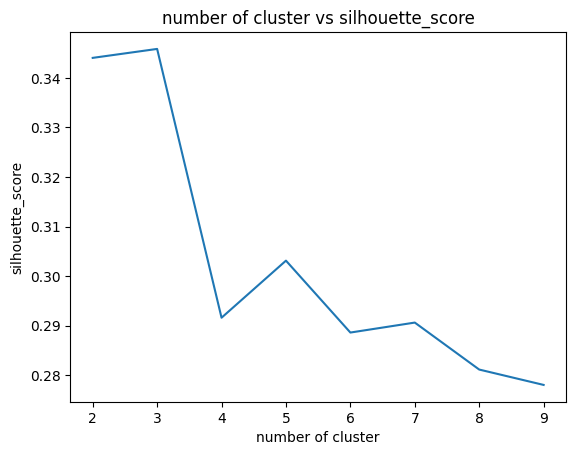

In [132]:
# Detecting number of clusters using Silhouette Score

plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [133]:
# Select number of clusters k= 2
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 2)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [134]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(3924, 6038, 0)

In [135]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
57839          17.91  171.00         188.91                     2   
52486          16.14   53.90          70.04                     1   
53558          22.32   55.90         156.44                     4   
57700          15.10   43.20          58.30                     1   
33676          13.14  144.41         157.55                     1   

       cluster_label  
57839              0  
52486              1  
53558              0  
57700              1  
33676              1

In [136]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0             1
freight_value        count  3924.000000   6038.000000
                     mean     20.467317     20.273263
                     std      16.234778     17.433284
                     min       0.000000      0.000000
                     25%      13.240000     13.080000
                     50%      16.540000     16.335000
                     75%      21.342500     21.250000
                     max     245.750000    375.280000
price                count  3924.000000   6038.000000
                     mean    119.810092    122.658566
                     std     171.126201    194.675003
                     min       3.500000      1.200000
                     25%      39.900000     41.922500
                     50%      75.000000     77.700000
                     75%     133.525000    134.900000
                     max    2999.990000   4059.000000
payment_value        count  3924.000000   6038.000000
                     mean    171.434350    180.082925
                     std     222.831764    355.119477
                     min       0.010000      0.000000
                     25%      61.080000     62.177500
                     50%     111.815000    108.370000
                     75%     194.287500    187.400000
                     max    4445.500000  13664.080000
payment_installments count  3924.000000   6038.000000
                     mean      2.949032      2.991222
                     std       2.824631      2.833066
                     min       1.000000      1.000000
                     25%       1.000000      1.000000
                     50%       1.000000      2.000000
                     75%       4.000000      4.000000
                     max      23.000000     24.000000

In [137]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9962
9962


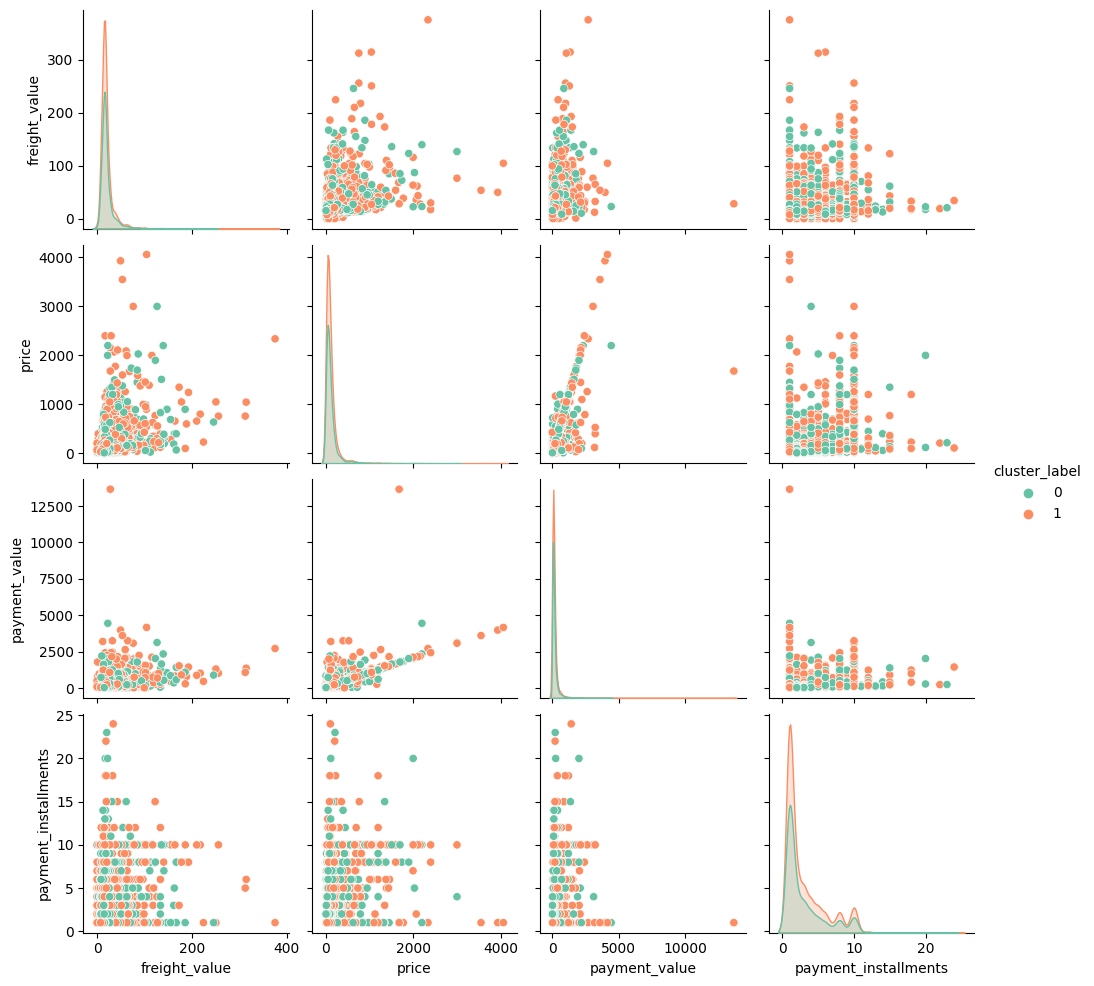

In [138]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= 'Set2')

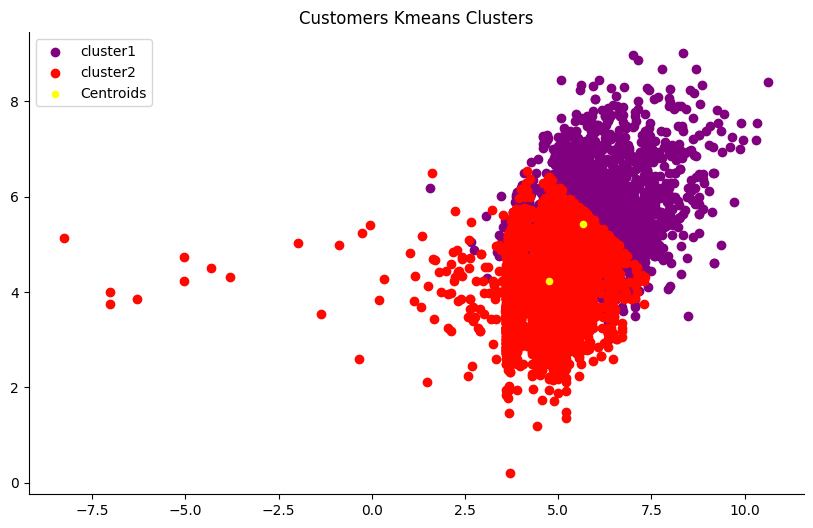

In [139]:
# show k-mean cluster

plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = '#81007F',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = '#FF0800',label = 'cluster2')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [140]:
# Select number of clusters k= 3
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [141]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(3921, 6040, 1)

In [142]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
57839          17.91  171.00         188.91                     2   
52486          16.14   53.90          70.04                     1   
53558          22.32   55.90         156.44                     4   
57700          15.10   43.20          58.30                     1   
33676          13.14  144.41         157.55                     1   

       cluster_label  
57839              0  
52486              1  
53558              0  
57700              1  
33676              1

In [143]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0             1      2
freight_value        count  3921.000000   6040.000000   1.00
                     mean     20.463272     20.276094  19.61
                     std      16.239468     17.431344    NaN
                     min       0.000000      0.000000  19.61
                     25%      13.240000     13.080000  19.61
                     50%      16.540000     16.335000  19.61
                     75%      21.300000     21.282500  19.61
                     max     245.750000    375.280000  19.61
price                count  3921.000000   6040.000000   1.00
                     mean    119.775289    122.690118  60.00
                     std     171.202008    194.634867    NaN
                     min       3.500000      1.200000  60.00
                     25%      39.900000     42.000000  60.00
                     50%      75.000000     77.900000  60.00
                     75%     133.200000    134.900000  60.00
                     max    2999.990000   4059.000000  60.00
payment_value        count  3921.000000   6040.000000   1.00
                     mean    171.350332    180.149806  79.61
                     std     222.958571    355.040087    NaN
                     min       0.010000      0.000000  79.61
                     25%      60.760000     62.387500  79.61
                     50%     111.690000    108.440000  79.61
                     75%     194.370000    187.380000  79.61
                     max    4445.500000  13664.080000  79.61
payment_installments count  3921.000000   6040.000000   1.00
                     mean      2.944402      2.994536   1.00
                     std       2.822643      2.834416    NaN
                     min       1.000000      1.000000   1.00
                     25%       1.000000      1.000000   1.00
                     50%       1.000000      2.000000   1.00
                     75%       4.000000      4.000000   1.00
                     max      23.000000     24.000000   1.00

In [144]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9962
9962


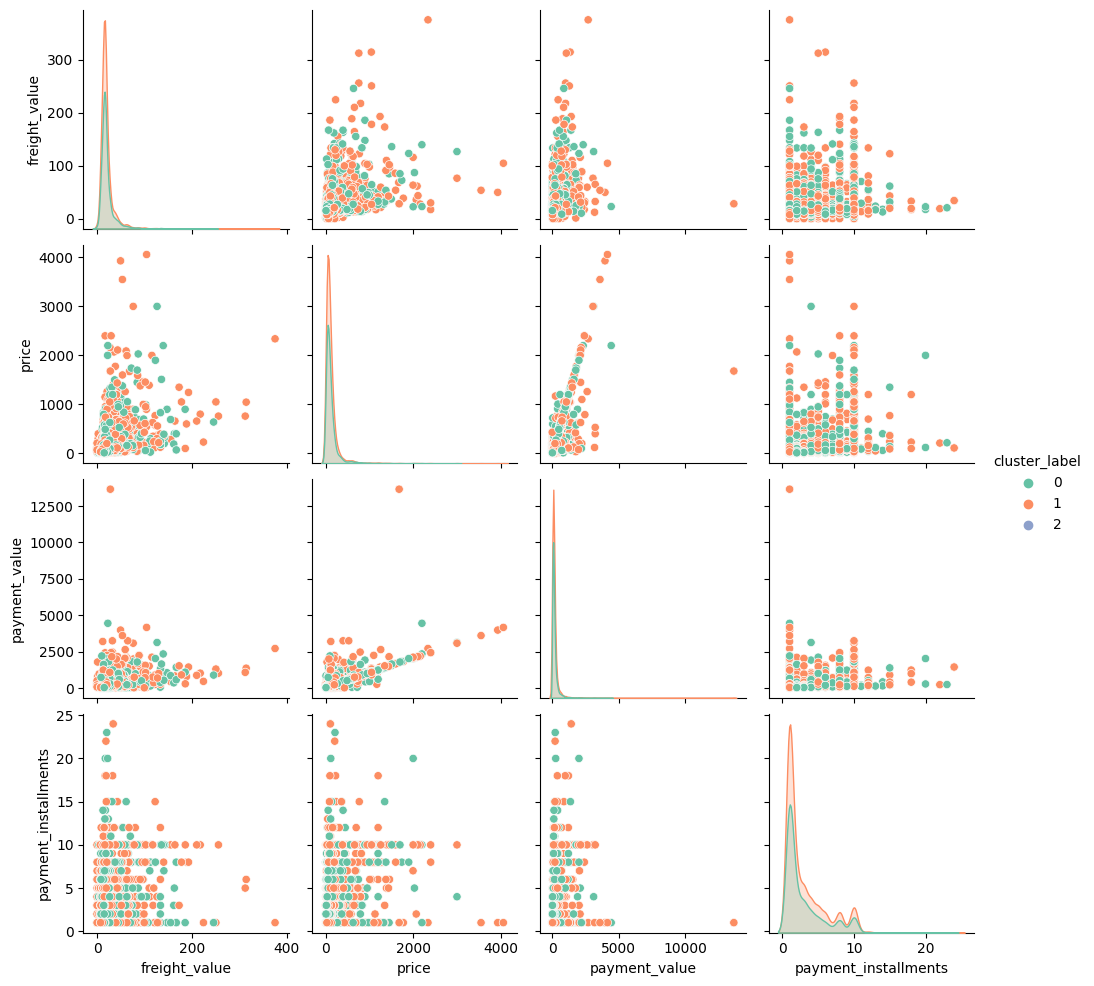

In [145]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= 'Set2')

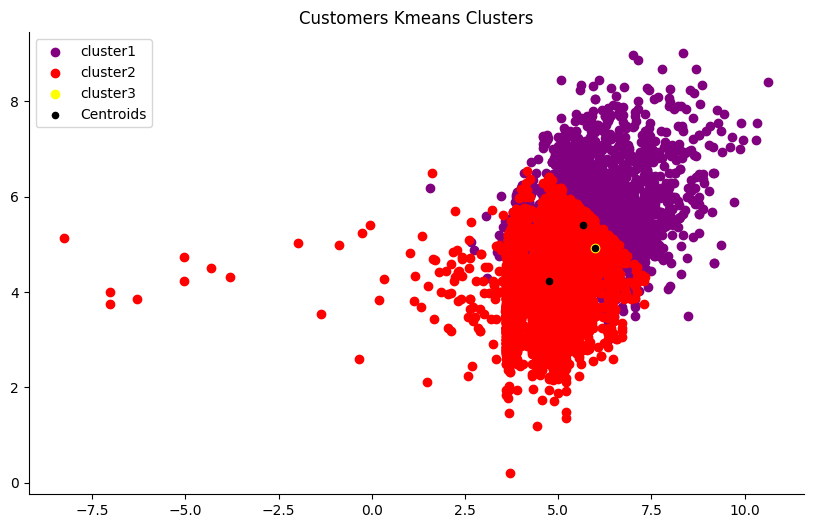

In [146]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = '#81007F',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = '#FF0000',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = '#FFFF00',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='black', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [147]:
# Select number of clusters k= 4
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters= 4)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [148]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(2868, 3267, 1)

In [149]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
57839          17.91  171.00         188.91                     2   
52486          16.14   53.90          70.04                     1   
53558          22.32   55.90         156.44                     4   
57700          15.10   43.20          58.30                     1   
33676          13.14  144.41         157.55                     1   

       cluster_label  
57839              0  
52486              3  
53558              1  
57700              3  
33676              0

In [150]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                          0            1      2             3
freight_value        count   2868.000000  3267.000000   1.00   3826.000000
                     mean      20.389261    20.457769  19.61     20.227959
                     std       17.337767    16.588271    NaN     17.021369
                     min        0.000000     0.000000  19.61      0.000000
                     25%       13.105000    13.140000  19.61     13.110000
                     50%       16.520000    16.470000  19.61     16.275000
                     75%       21.305000    21.350000  19.61     21.220000
                     max      314.400000   250.570000  19.61    375.280000
price                count   2868.000000  3267.000000   1.00   3826.000000
                     mean     123.210837   120.612801  60.00    121.086388
                     std      179.796809   179.628683    NaN    195.113267
                     min        5.180000     3.500000  60.00      1.200000
                     25%       40.000000    39.900000  60.00     41.992500
                     50%       75.000000    75.990000  60.00     78.800000
                     75%      134.900000   133.650000  60.00    134.530000
                     max     2399.000000  2999.990000  60.00   4059.000000
payment_value        count   2868.000000  3267.000000   1.00   3826.000000
                     mean     178.792521   173.877441  79.61    177.505209
                     std      341.543147   234.513903    NaN    340.005850
                     min        0.000000     0.010000  79.61      0.220000
                     25%       61.517500    60.100000  79.61     63.155000
                     50%      106.950000   112.120000  79.61    109.920000
                     75%      191.215000   195.015000  79.61    185.827500
                     max    13664.080000  4445.500000  79.61  13664.080000
payment_installments count   2868.000000  3267.000000   1.00   3826.000000
                     mean       2.949791     2.965106   1.00      3.001830
                     std        2.774942     2.819212    NaN      2.879496
                     min        1.000000     1.000000   1.00      1.000000
                     25%        1.000000     1.000000   1.00      1.000000
                     50%        1.000000     1.000000   1.00      1.000000
                     75%        4.000000     4.000000   1.00      4.000000
                     max       23.000000    20.000000   1.00     24.000000

In [151]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9962
9962


In [152]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= 'Set2')

In [153]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = '#C8A2C8',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = '#FF0000',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = '#81007F',label = 'cluster3')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = '#00FF41',label = 'cluster4')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='black', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [154]:
# define the relationship between customer location and behavioural customer segmentation
# Example: Most of the loss customers come from which location? Which state has the most vip customer?

# Assuming 'zip_code' is the column containing 5-digit zip codes
rfm_location_table = df_segmentation.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (datetime.strptime(str(max_trans_date), '%Y-%m-%d') - x.max()).days,
    'order_id': lambda x: len(x),
    'payment_value': lambda x: sum(x),
    'customer_zip_code_prefix': 'first'  
})
rfm_location_table

order_purchase_timestamp  order_id  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2                       110         1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       113         1   
0000f46a3911fa3c0805444483337064                       536         1   
0000f6ccb0745a6a4b88665a16c9f078                       320         1   
0004aac84e0df4da2b147fca70cf8255                       287         1   
...                                                    ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684                       446         2   
fffea47cd6d3cc0a88bd621562a9d061                       261         1   
ffff371b4d645b6ecea244b27531430a                       567         1   
ffff5962728ec6157033ef9805bacc48                       118         1   
ffffd2657e2aad2907e67c3e9daecbeb                       483         1   

                                  payment_value  customer_zip_code_prefix  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2         141.90                      7787  
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19                      6053  
0000f46a3911fa3c0805444483337064          86.22                     88115  
0000f6ccb0745a6a4b88665a16c9f078          43.62                     66812  
0004aac84e0df4da2b147fca70cf8255         196.89                     18040  
...                                         ...                       ...  
fffcf5a5ff07b0908bd4e2dbc735a684        4134.84                     55250  
fffea47cd6d3cc0a88bd621562a9d061          84.58                     44054  
ffff371b4d645b6ecea244b27531430a         112.46                     78552  
ffff5962728ec6157033ef9805bacc48         133.69                     29460  
ffffd2657e2aad2907e67c3e9daecbeb          71.56                     83608  

[91013 rows x 4 columns]

In [155]:
# Rename columns for clarity
rfm_location_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary',
    'customer_zip_code_prefix': 'Location'
}, inplace=True)
rfm_location_table

Recency  Frequency  Monetary  Location
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053
0000f46a3911fa3c0805444483337064      536          1     86.22     88115
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040
...                                   ...        ...       ...       ...
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608

[91013 rows x 4 columns]

In [156]:
# Create Recency, Frequency and Monetary scores
rfm_location_table['r_score'] = pd.qcut(rfm_location_table['Recency'], 4, ['4', '3', '2', '1'])
rfm_location_table['f_score'] = pd.qcut(rfm_location_table['Frequency'].rank(method='first'), 4, ['1', '2', '3', '4'])
rfm_location_table['m_score'] = pd.qcut(rfm_location_table['Monetary'], 4, ['1', '2', '3', '4'])
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3  
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1  
0000f46a3911fa3c0805444483337064       1       1       2  
0000f6ccb0745a6a4b88665a16c9f078       2       1       1  
0004aac84e0df4da2b147fca70cf8255       2       1       3  
...                                  ...     ...     ...  
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4  
fffea47cd6d3cc0a88bd621562a9d061       2       4       2  
ffff371b4d645b6ecea244b27531430a       1       4       2  
ffff5962728ec6157033ef9805bacc48       3       4       3  
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2  

[91013 rows x 7 columns]

In [157]:
# Calculate RFM Score
rfm_location_table['rfm_score'] = 100 * rfm_location_table['r_score'].astype(int) + 10 * rfm_location_table['f_score'].astype(int)+ rfm_location_table['m_score'].astype(int)
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413  
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311  
0000f46a3911fa3c0805444483337064       1       1       2        112  
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211  
0004aac84e0df4da2b147fca70cf8255       2       1       3        213  
...                                  ...     ...     ...        ...  
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144  
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242  
ffff371b4d645b6ecea244b27531430a       1       4       2        142  
ffff5962728ec6157033ef9805bacc48       3       4       3        343  
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142  

[91013 rows x 8 columns]

In [158]:
rfm_location_table['customer_segmentation'] = rfm_location_table['rfm_score'].apply(customer_segmenation)
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311   
0000f46a3911fa3c0805444483337064       1       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211   
0004aac84e0df4da2b147fca70cf8255       2       1       3        213   
...                                  ...     ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242   
ffff371b4d645b6ecea244b27531430a       1       4       2        142   
ffff5962728ec6157033ef9805bacc48       3       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[91013 rows x 9 columns]

In [159]:
# Merge the world map data with the customer segment analysis
map_data = pd.merge(geolocation, rfm_location_table, left_on='geolocation_zip_code_prefix', right_on='Location', how='left')
map_data

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                                1037       -23.545621       -46.639292   
1                                1037       -23.545621       -46.639292   
2                                1037       -23.545621       -46.639292   
3                                1046       -23.546081       -46.644820   
4                                1046       -23.546081       -46.644820   
...                               ...              ...              ...   
13750291                        99950       -28.070104       -52.018658   
13750292                        99950       -28.070104       -52.018658   
13750293                        99950       -28.070104       -52.018658   
13750294                        99950       -28.070104       -52.018658   
13750295                        99950       -28.070104       -52.018658   

         geolocation_city  geolocation_state  Recency  Frequency  Monetary  \
0               São Paulo          São Paulo    112.0        2.0   1621.04   
1               São Paulo          São Paulo     11.0        1.0     33.34   
2               São Paulo          São Paulo    104.0        1.0    136.67   
3               São Paulo          São Paulo    532.0        1.0    114.77   
4               São Paulo          São Paulo     49.0        1.0     78.64   
...                   ...                ...      ...        ...       ...   
13750291         tapejara  Rio Grande do Sul    183.0        1.0     92.19   
13750292         tapejara  Rio Grande do Sul    421.0        1.0    116.94   
13750293         tapejara  Rio Grande do Sul    104.0        1.0    299.76   
13750294         tapejara  Rio Grande do Sul    474.0        1.0    145.66   
13750295         tapejara  Rio Grande do Sul     83.0        1.0     86.75   

          Location r_score f_score m_score  rfm_score  \
0           1037.0       4       4       4      444.0   
1           1037.0       4       1       1      411.0   
2           1037.0       4       2       3      423.0   
3           1046.0       1       1       3      113.0   
4           1046.0       4       1       2      412.0   
...            ...     ...     ...     ...        ...   
13750291   99950.0       3       3       2      332.0   
13750292   99950.0       1       3       3      133.0   
13750293   99950.0       4       4       4      444.0   
13750294   99950.0       1       4       3      143.0   
13750295   99950.0       4       4       2      442.0   

                customer_segmentation  
0                                 VIP  
1                        New Customer  
2         Potential Loyalist Customer  
3                      Lost customers  
4                        New Customer  
...                               ...  
13750291           Potential Customer  
13750292               Lost customers  
13750293                          VIP  
13750294               Lost customers  
13750295          Very Loyal Customer  

[13750296 rows x 14 columns]

In [160]:
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
# libraries to plot graphs on world map

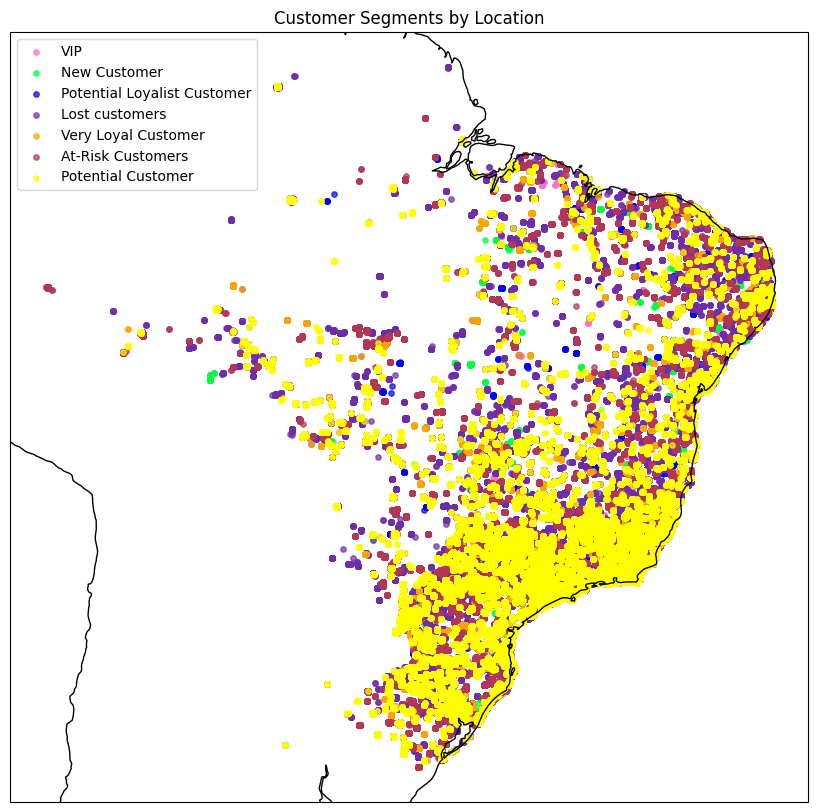

In [161]:
# Create a GeoDataFrame for spatial analysis
geometry = [Point(xy) for xy in zip(map_data['geolocation_lng'], map_data['geolocation_lat'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(resolution='50m')

# Define colors for each customer segment
segment_colors = {
    'VIP': '#FF6EC7',
    'Very Loyal Customer': '#FFA500',
    'Potential Loyalist Customer': 'blue',
    'New Customer': '#00FF41',
    'Potential Customer': '#FFFF00',
    'At-Risk Customers': '#B43757',
    'Lost customers': '#6F2DA8'
}

# Scatter plot with different colors for each customer segment
for segment in map_data['customer_segmentation'].unique():
    segment_data = gdf[gdf['customer_segmentation'] == segment]
    if not segment_data.empty:
        ax.scatter(
            segment_data['geolocation_lng'],
            segment_data['geolocation_lat'],
            label=segment,
            alpha=0.7,
            s=15,
            color=segment_colors.get(segment, 'black')  # Use black if color not defined
        )
        
# Set plot title
plt.title('Customer Segments by Location')
plt.legend()

# Display the plot
plt.show()

In [162]:
# Natural Processing Language for customer reviews

In [163]:
reviews_df = pd.read_csv("reviews_full.csv")
reviews_df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [164]:
# Remove 'review_comment_title' because of high missing values perentage and remove other features for unneccessity
reviews_df = reviews_df[['review_comment_message', 'review_score']]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   review_score            99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [165]:
# Drop missing values
reviews_df.dropna(inplace= True)

# Rename columns for ease
reviews_df.rename(columns = {'review_comment_message' : 'comment', 'review_score' : 'score'}, inplace= True)

# Reset index
reviews_df.reset_index(inplace= True, drop= True)

In [166]:
# Encode scores to be Satisfied or Not Satisfied
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

reviews_df['score'] = reviews_df['score'].map(encoded_class)

In [167]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

stemmer = PorterStemmer()
corpus = []

for i in range(reviews_df.shape[0]):
    # Remove any special characters or number
    comment = re.sub('[^a-zA-Z]', ' ', reviews_df.comment[i])
    # Lower text
    comment = comment.lower()
    # Remove any spaces before or after text
    comment = comment.strip()
    # Split text for stemming
    comment = comment.split()
    # Stemming words in Portuguese
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    # Merge stemmed words to be sentences
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['recebi bem ant prazo estipulado',
 'parab ns loja lannist adorei comprar internet seguro pr tico parab ns todo feliz p scoa',
 'aparelho eficient site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega ant prazo',
 'gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilment entrega efetuada ant prazo dado produto j come usado at present problema',
 'rel gio bonito barato',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'recebi exatament esperava demai encomenda outro vendedor atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completament apaixonada loja super respon vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou ate ant prazo adorei produto',


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TFIDF Vectorizer to convert text into numbers
tf = TfidfVectorizer()
df_new = tf.fit_transform(corpus).toarray()

In [169]:
df_new = pd.DataFrame(df_new, columns= tf.get_feature_names_out())
df_new

aa  aaa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  \
0      0.0  0.0                                                0.0        
1      0.0  0.0                                                0.0        
2      0.0  0.0                                                0.0        
3      0.0  0.0                                                0.0        
4      0.0  0.0                                                0.0        
...    ...  ...                                                ...        
40972  0.0  0.0                                                0.0        
40973  0.0  0.0                                                0.0        
40974  0.0  0.0                                                0.0        
40975  0.0  0.0                                                0.0        
40976  0.0  0.0                                                0.0        

       aaguardando  aainda  aancheira  aaprelho   ab  aba  abafada  ...   zl  \
0              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
1              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
2              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
3              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
4              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
...            ...     ...        ...       ...  ...  ...      ...  ...  ...   
40972          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40973          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40974          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40975          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40976          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   

        zo  zona  zoo  zoom  zuado  zufer  zumax  zupin  zxdad  
0      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
1      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
2      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
3      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
4      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
...    ...   ...  ...   ...    ...    ...    ...    ...    ...  
40972  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40973  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40974  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40975  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40976  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  

[40977 rows x 12515 columns]

In [170]:
X = df_new
y = reviews_df['score']

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.87      0.83      0.85     11557
    Satisfied       0.91      0.94      0.92     21224

     accuracy                           0.90     32781
    macro avg       0.89      0.88      0.89     32781
 weighted avg       0.90      0.90      0.90     32781

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.85      0.80      0.82      2890
    Satisfied       0.89      0.92      0.91      5306

     accuracy                           0.88      8196
    macro avg       0.87      0.86      0.87      8196
 weighted avg       0.88      0.88      0.88      8196



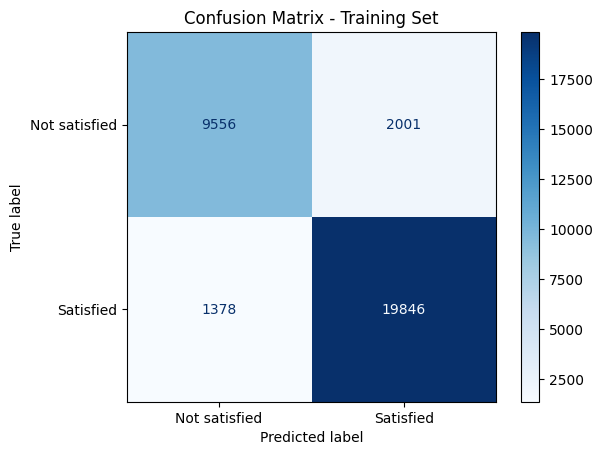

In [172]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

# Get confusion matrix for training set (use nb.predict instead of lr.predict)
cm_train = confusion_matrix(y_train, nb.predict(x_train))

# Get confusion matrix for testing set (use nb.predict instead of lr.predict)
cm_test = confusion_matrix(y_test, nb.predict(x_test))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not satisfied', 'Satisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not satisfied', 'Satisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()


In [173]:
# Create a separate DataFrame to check reasons of non satisfaction 
non_satisfied = reviews_df[reviews_df.score == 'Not Satisfied']

# Reset index
non_satisfied.reset_index(inplace= True, drop= True)

In [174]:
stemmer = PorterStemmer()
corpus = []

for i in range(non_satisfied.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', non_satisfied.comment[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'nada chegar pedido',
 'recebi soment control midea split estilo faltou control remoto ar condicionado consul',
 'produto n chegou prazo estipulado causou transtorno pq programei viagem f ria filho baseado prazo moro bahia cuiab sozinho agora casa est vazia',
 'comprei dua unidad s recebi agora fa',
 'produto bom m veio mim n condiz foto an ncio',
 'produto inferior mal acabado',
 'entrega prazo',
 'pedi reembolso resposta at momento',
 'produto chegou pc n conseguiu reconhec porta usb',
 'pedido bald pe bloco montar un r cada n entregu vendido entregu targaryen tapet eva n letra pe crian un r entreg',
 'comprei tre pacot cinco folha cada papel transfer tecido escuro so recebi doi',
 'demor pra entrega',
 'entrega dividida dua n comunicado loja cheguei pensar 

In [175]:
pip install deep_translator


In [176]:
from deep_translator import GoogleTranslator
import random

non_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    non_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    
non_satisfied_trans

["product still hasn't arrived",
 'through the gel cell came another device',
 "They didn't deliver the deadline on the next day, scissors will be bought here because the company hasn't committed, send an email to reassure",
 'I will not confirm delivery where the product purchased only arrived, only the purchase code tracking says delivery of the goods is complicated',
 "apparently good product, still haven't had time to test it",
 'thanks',
 "No information, no order, I will receive it, the problem happened, I can't contact the necessary information.",
 'delivery delay product arrived defective',
 'only product delivered rope not received palm',
 'I bought two perfumes and they only came with a box to help, counterfeit perfume marked with a prohibited sale box, only for testing',
 "The brush kit didn't arrive, it may come separately, anyway, I didn't like the shipping method because it says product delivered",
 "delivered quickly I didn't like the product, bad fabric",
 "Hello, I bou

In [177]:
# Apply stemming to the translated text
non_satisfied_final = []

for sent in non_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            non_satisfied_final.append(stemmer.stem(word))

non_satisfied_final

['product',
 'still',
 'arriv',
 'gel',
 'cell',
 'came',
 'anoth',
 'devic',
 'they',
 'deliv',
 'deadlin',
 'next',
 'day,',
 'scissor',
 'bought',
 'compani',
 'committed,',
 'send',
 'email',
 'reassur',
 'i',
 'confirm',
 'deliveri',
 'product',
 'purchas',
 'arrived,',
 'purchas',
 'code',
 'track',
 'say',
 'deliveri',
 'good',
 'complic',
 'appar',
 'good',
 'product,',
 'still',
 'time',
 'test',
 'thank',
 'no',
 'information,',
 'order,',
 'i',
 'receiv',
 'it,',
 'problem',
 'happened,',
 'i',
 "can't",
 'contact',
 'necessari',
 'information.',
 'deliveri',
 'delay',
 'product',
 'arriv',
 'defect',
 'product',
 'deliv',
 'rope',
 'receiv',
 'palm',
 'i',
 'bought',
 'two',
 'perfum',
 'came',
 'box',
 'help,',
 'counterfeit',
 'perfum',
 'mark',
 'prohibit',
 'sale',
 'box,',
 'test',
 'the',
 'brush',
 'kit',
 'arrive,',
 'may',
 'come',
 'separately,',
 'anyway,',
 'i',
 'like',
 'ship',
 'method',
 'say',
 'product',
 'deliv',
 'deliv',
 'quickli',
 'i',
 'like',
 'pro

In [178]:
# Visualize most common words for non-satsifaction
from wordcloud import WordCloud

non_satisfied_final = ' '.join(non_satisfied_final)
non_satisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(non_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(non_satisfied_freq)
plt.axis("off")

(-0.5, 999.5, 799.5, -0.5)

In [179]:
# Sort the word frequencies in descending order
non_satisfied_freq = non_satisfied_freq.process_text(non_satisfied_final)
sorted_word_frequencies = sorted(non_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

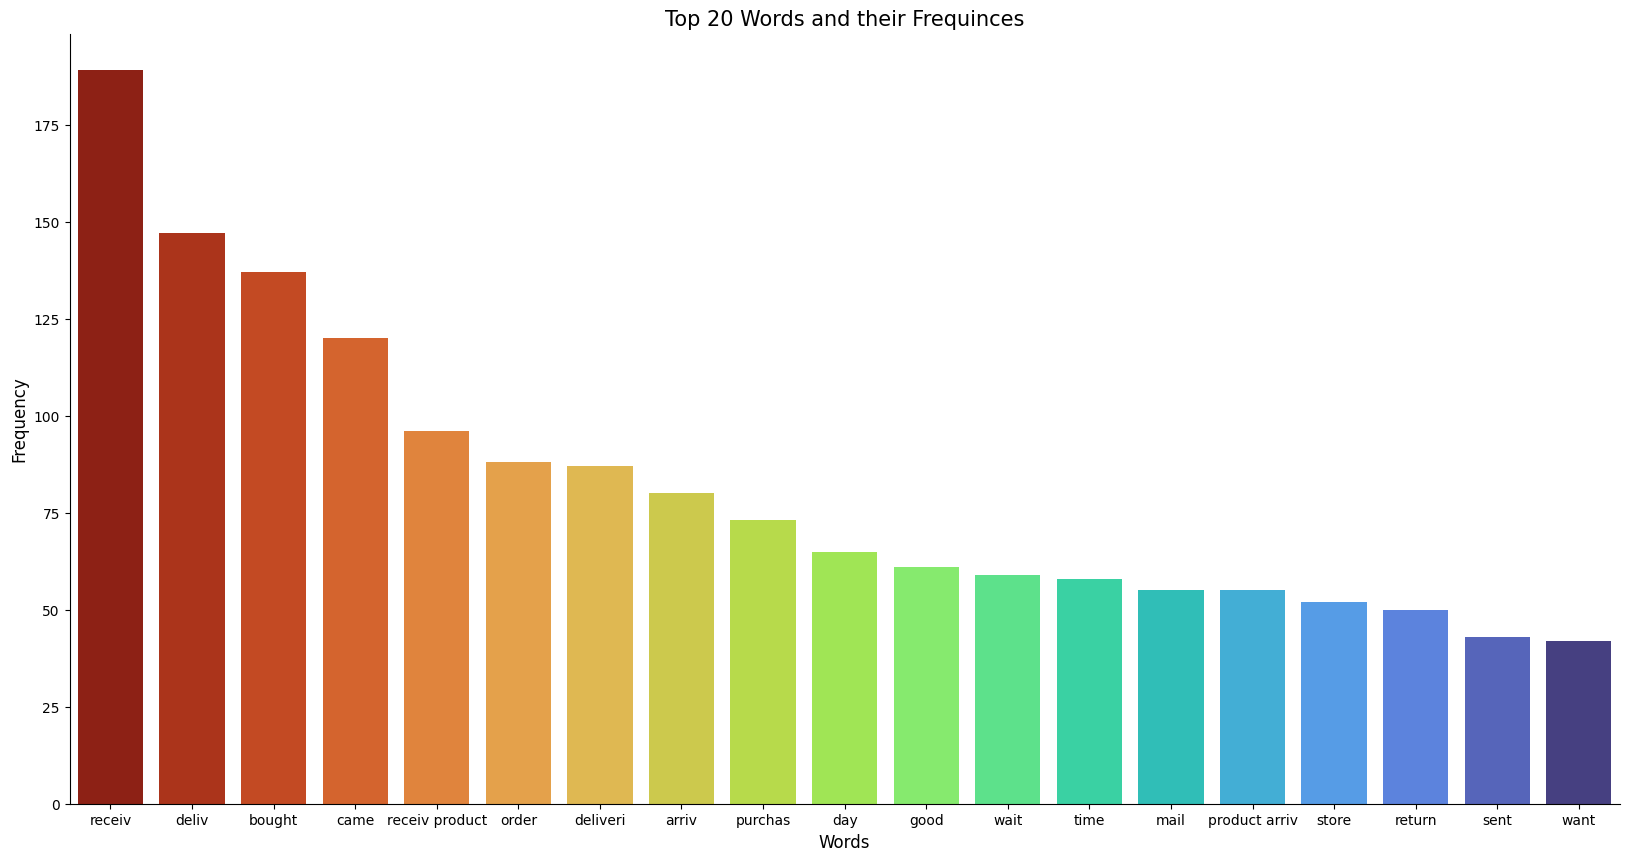

In [180]:
# Plot Words vs Frequency
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[1:20][0], y= pd.DataFrame(sorted_word_frequencies)[1:20][1], palette= 'turbo_r')
plt.title('Top 20 Words and their Frequinces', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()